## Problem statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

## Step 1 : Data understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Set display limits
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
#reading the source data
input_df = pd.read_csv("train.csv", index_col=0)

In [4]:
input_df.shape

(1460, 80)

In [5]:
input_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## Step 2 : Data preparation

In [7]:
# Check the null values for the columns
nullDF = pd.DataFrame({"Null_val":input_df.isnull().sum()})
nullDF.loc[nullDF["Null_val"] > 1].sort_values(by=["Null_val"],ascending=False)

,Null_val
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [8]:
## Check the null values percentage
nullDF = pd.DataFrame({"Null%":round(input_df.isnull().sum()*100/len(input_df),2)})
nullDF.loc[nullDF["Null%"] > 1].sort_values(by=["Null%"],ascending=False)

,Null%
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
MasVnrType,59.73
FireplaceQu,47.26
LotFrontage,17.74
GarageType,5.55
GarageYrBlt,5.55
GarageFinish,5.55


In [9]:
# Dropping columns Alley, FireplaceQu, PoolQC, Fence, MiscFeature which has high % of null values
drop_list = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"]
input_df.drop(drop_list, axis=1, inplace=True)

##### Observation : Dropped the columns with high percentage of null values. Columns Alley, FireplaceQu, PoolQC, Fence, MiscFeature has more than 45% of null values and won't be useful for the analysis

In [10]:
#Check the null values percentage
nullDF = pd.DataFrame({"Null%":round(input_df.isnull().sum()*100/len(input_df),2)})
nullDF.loc[nullDF["Null%"] > 1].sort_values(by=["Null%"],ascending=False)

,Null%
MasVnrType,59.73
LotFrontage,17.74
GarageType,5.55
GarageYrBlt,5.55
GarageFinish,5.55
GarageQual,5.55
GarageCond,5.55
BsmtExposure,2.60
BsmtFinType2,2.60
BsmtQual,2.53


In [11]:
#Checking "LotFrontage" as it has high null %
input_df[['LotFrontage']].describe()

,LotFrontage
count,1201.000000
mean,70.049958
std,24.284752
min,21.000000
25%,59.000000
50%,69.000000
75%,80.000000
max,313.000000


In [12]:
#Adding median value for fill the null values
input_df['LotFrontage'] = input_df['LotFrontage'].fillna(input_df['LotFrontage'].median())

In [13]:
input_df[['LotFrontage']].describe()

,LotFrontage
count,1460.000000
mean,69.863699
std,22.027677
min,21.000000
25%,60.000000
50%,69.000000
75%,79.000000
max,313.000000


In [14]:
# Check the null values percentage
nullDF = pd.DataFrame({"Null%":round(input_df.isnull().sum()*100/len(input_df),2)})
nullDF.loc[nullDF["Null%"] > 1].sort_values(by=["Null%"],ascending=False)

,Null%
MasVnrType,59.73
GarageType,5.55
GarageYrBlt,5.55
GarageFinish,5.55
GarageQual,5.55
GarageCond,5.55
BsmtExposure,2.60
BsmtFinType2,2.60
BsmtQual,2.53
BsmtCond,2.53


##### Observation : Garage variables have similar % of null values and need to check the count of these values to fill the void.

In [15]:
garrage_list = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]

for col in garrage_list:
    print("\n", col)
    print(input_df[col].value_counts())
    print("\n", "Null values for " + col)
    print(input_df[col].isnull().sum())



 GarageType
GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

 Null values for GarageType
81

 GarageFinish
GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

 Null values for GarageFinish
81

 GarageQual
GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

 Null values for GarageQual
81

 GarageCond
GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

 Null values for GarageCond
81


##### Observation : "GarageType", "GarageFinish", "GarageQual", "GarageCond" are categorial variables so filling it with "NA" value as the records for these null values are considered as null No garage.

In [16]:
for col in garrage_list:
    input_df[col].fillna('NA', inplace=True)
input_df['GarageYrBlt'].fillna(0, inplace=True)

In [17]:
for col in garrage_list:
    print("\n", col)
    print(input_df[col].value_counts())
    print("\n", "Null values for " + col)
    print(input_df[col].isnull().sum())


 GarageType
GarageType
Attchd     870
Detchd     387
BuiltIn     88
NA          81
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

 Null values for GarageType
0

 GarageFinish
GarageFinish
Unf    605
RFn    422
Fin    352
NA      81
Name: count, dtype: int64

 Null values for GarageFinish
0

 GarageQual
GarageQual
TA    1311
NA      81
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

 Null values for GarageQual
0

 GarageCond
GarageCond
TA    1326
NA      81
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

 Null values for GarageCond
0


In [18]:
## Check the null values percentage
nullDF = pd.DataFrame({"Null%":round(input_df.isnull().sum()*100/len(input_df),2)})
nullDF.loc[nullDF["Null%"] > 1].sort_values(by=["Null%"],ascending=False)

,Null%
MasVnrType,59.73
BsmtExposure,2.60
BsmtFinType2,2.60
BsmtQual,2.53
BsmtCond,2.53
BsmtFinType1,2.53


In [19]:
basement_list = ["BsmtExposure", "BsmtFinType2", "BsmtQual", "BsmtCond","BsmtFinType1"]
for col in basement_list:
    print("\n", col)
    print(input_df[col].value_counts())
    print("\n", "Null values for " + col)
    print(input_df[col].isnull().sum())


 BsmtExposure
BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

 Null values for BsmtExposure
38

 BsmtFinType2
BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

 Null values for BsmtFinType2
38

 BsmtQual
BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

 Null values for BsmtQual
37

 BsmtCond
BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

 Null values for BsmtCond
37

 BsmtFinType1
BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

 Null values for BsmtFinType1
37


In [20]:
for col in basement_list:
    input_df[col].fillna('No basement', inplace=True)

In [21]:
basement_list = ["BsmtExposure", "BsmtFinType2", "BsmtQual", "BsmtCond","BsmtFinType1"]
for col in basement_list:
    print("\n", col)
    print(input_df[col].value_counts())
    print("\n", "Null values for " + col)
    print(input_df[col].isnull().sum())


 BsmtExposure
BsmtExposure
No             953
Av             221
Gd             134
Mn             114
No basement     38
Name: count, dtype: int64

 Null values for BsmtExposure
0

 BsmtFinType2
BsmtFinType2
Unf            1256
Rec              54
LwQ              46
No basement      38
BLQ              33
ALQ              19
GLQ              14
Name: count, dtype: int64

 Null values for BsmtFinType2
0

 BsmtQual
BsmtQual
TA             649
Gd             618
Ex             121
No basement     37
Fa              35
Name: count, dtype: int64

 Null values for BsmtQual
0

 BsmtCond
BsmtCond
TA             1311
Gd               65
Fa               45
No basement      37
Po                2
Name: count, dtype: int64

 Null values for BsmtCond
0

 BsmtFinType1
BsmtFinType1
Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No basement     37
Name: count, dtype: int64

 Null values for BsmtFinType1
0


##### Observation : "BsmtExposure", "BsmtFinType2", "BsmtQual", "BsmtCond","BsmtFinType1" are categorial variables so filling it with "No basement" value as the records for these null values are considered as No basement.

In [22]:
# Check the null values percentage
nullDF = pd.DataFrame({"Null%":round(input_df.isnull().sum()*100/len(input_df),2)})
nullDF.loc[nullDF["Null%"] > 0].sort_values(by=["Null%"],ascending=False)

,Null%
MasVnrType,59.73
MasVnrArea,0.55
Electrical,0.07


In [23]:
input_df.shape

(1460, 75)

In [24]:
# Checking the value counts for the MasVnrType column to analyse the missing values
input_df["MasVnrType"].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [25]:
# Filling it with 'None' values
input_df["MasVnrType"].fillna('None', inplace=True)

In [26]:
input_df["MasVnrType"].value_counts()

MasVnrType
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [27]:
# Check the null values percentage
nullDF = pd.DataFrame({"Null%":round(input_df.isnull().sum()*100/len(input_df),2)})
nullDF.loc[nullDF["Null%"] > 0].sort_values(by=["Null%"],ascending=False)

,Null%
MasVnrArea,0.55
Electrical,0.07


In [28]:
input_df["MasVnrArea"].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [29]:
input_df['MasVnrArea']= input_df.MasVnrArea.fillna(input_df.MasVnrArea.median()) 

In [30]:
input_df["MasVnrArea"].describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [31]:
# Dropping all the null columns
input_df.dropna(inplace=True)

In [32]:
# Check the null values percentage
nullDF = pd.DataFrame({"Null%":round(input_df.isnull().sum()*100/len(input_df),2)})
nullDF.loc[nullDF["Null%"] > 0].sort_values(by=["Null%"],ascending=False)

,Null%


In [33]:
# Checking the percentiles for the numerical categotries
input_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,56.881426,69.861549,10517.363948,6.100069,5.575737,1971.244003,1984.850583,103.187800,443.943797,46.581220,567.366004,1057.891021,1162.906785,346.791638,5.848526,1515.546950,0.425634,0.057574,1.564770,0.382454,2.866347,1.046607,6.517478,0.613434,1868.644962,1.766964,473.030158,94.240576,46.692255,21.969157,3.411926,15.071282,2.760795,43.518849,6.322824,2007.815627,180930.394791
std,42.310746,22.035077,9984.666267,1.383171,1.113079,30.199555,20.644343,180.773158,456.106417,161.369977,441.992392,438.500975,386.572089,436.610637,48.639512,525.650927,0.518969,0.238830,0.550987,0.502798,0.816050,0.220410,1.625902,0.644687,453.838403,0.747546,213.869604,125.381679,66.267472,61.137400,29.327247,55.775138,40.191018,496.291826,2.704331,1.328542,79468.964025
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,796.000000,882.000000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,333.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,50.000000,69.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,384.000000,0.000000,479.000000,992.000000,1088.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,164.500000,712.500000,0.000000,808.000000,1298.500000,1391.500000,728.000000,0.000000,1777.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,120.000000,92.000000,14388.400000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1066.000000,117.400000,1232.000000,1602.400000,1680.000000,954.400000,0.000000,2158.600000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.200000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,160.000000,104.000000,17402.300000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.400000,1468.000000,1753.000000,1831.500000,1141.100000,0.000000,2466.200000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.200000,335.000000,175.100000,180.300000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326200.000000
99%,190.000000,137.420000,37593.680000,10.000000,9.000000,2009.000000,2009.000000,791.360000,1572.420000,830.56

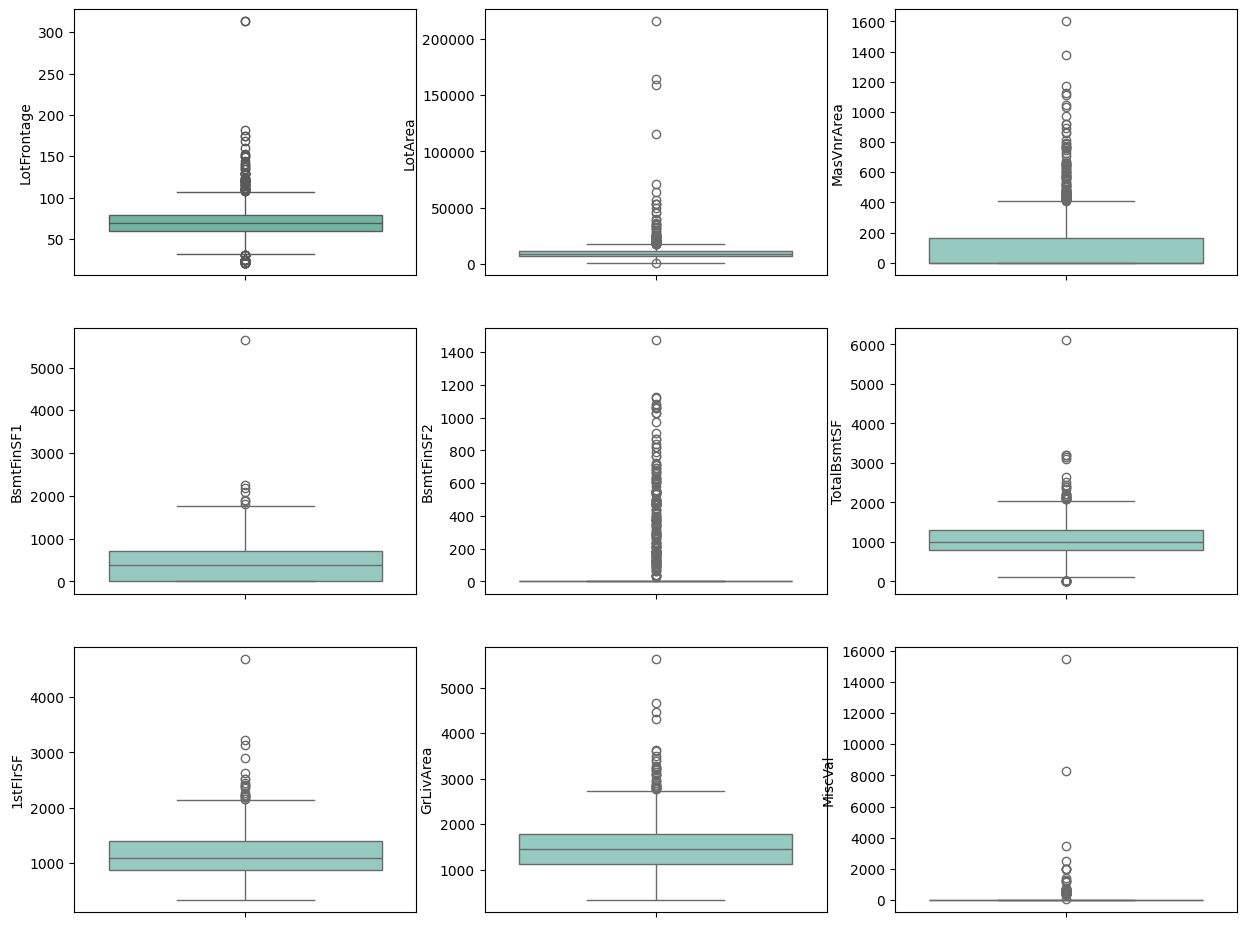

In [34]:
plt.figure(figsize=(15, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotFrontage', palette='Set2', data = input_df)
plt.subplot(5,3,2)
sns.boxplot(y = 'LotArea', palette='Set3', data = input_df)
plt.subplot(5,3,3)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = input_df)
plt.subplot(5,3,4)
sns.boxplot(y = 'BsmtFinSF1', palette='Set3', data = input_df)
plt.subplot(5,3,5)
sns.boxplot(y = 'BsmtFinSF2', palette='Set3', data = input_df)
plt.subplot(5,3,6)
sns.boxplot(y = 'TotalBsmtSF', palette='Set3', data = input_df)
plt.subplot(5,3,7)
sns.boxplot(y = '1stFlrSF', palette='Set3', data = input_df)
plt.subplot(5,3,8)
sns.boxplot(y = 'GrLivArea', palette='Set3', data = input_df)
plt.subplot(5,3,9)
sns.boxplot(y = 'MiscVal', palette='Set3', data = input_df)
plt.show()

##### Observation : As per the boxplot for the above variables we have the outliers for all the columns. We need to remove the outliers to proceed further

In [35]:
#Removing the skewed data by checking if the categorical variables has data skewed more than 85%
def getSkewedValueCounts():
    column = []
    categorical_columns = input_df.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(input_df[col].value_counts().max() >= 1240):
            column.append(col)
    return column

skewColumsnToRemove = getSkewedValueCounts()
input_df.drop(skewColumsnToRemove, axis = 1, inplace = True)

In [36]:
input_df.shape

(1459, 57)

## Step 3 : Data visualization


In [37]:
categorical_col = []
numerical_col = []

for col in list(input_df):
    if input_df[col].dtypes == 'object':
        categorical_col.append(col)  
    else:
        numerical_col.append(col)

In [38]:
numerical_col

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [39]:
categorical_col

['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'GarageType',
 'GarageFinish',
 'SaleCondition']

### Univariate analysis

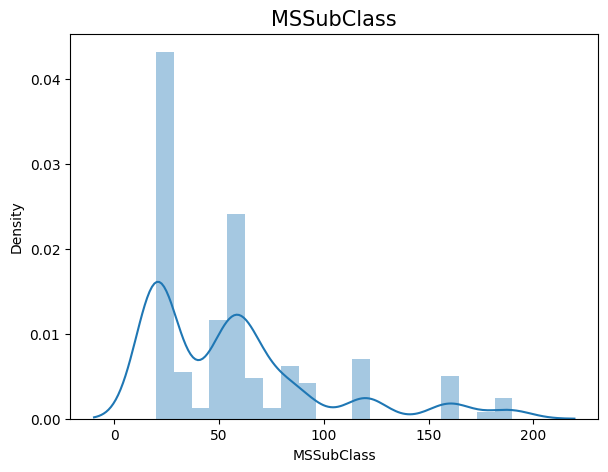

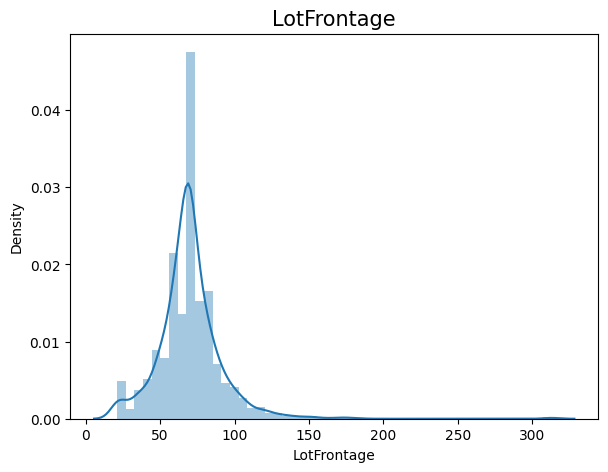

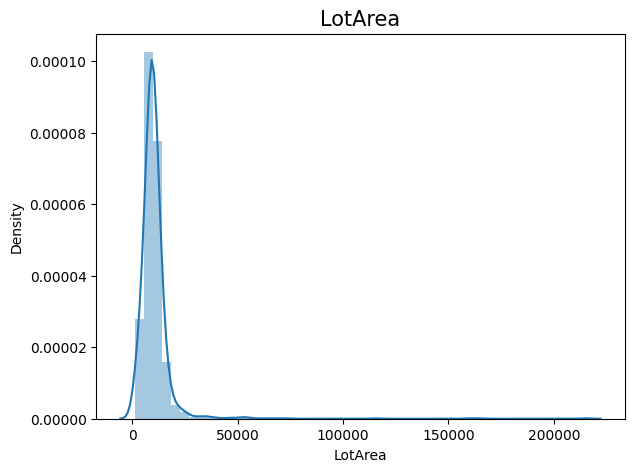

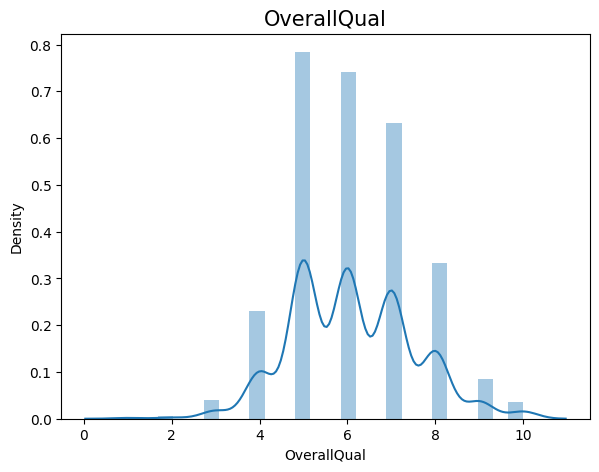

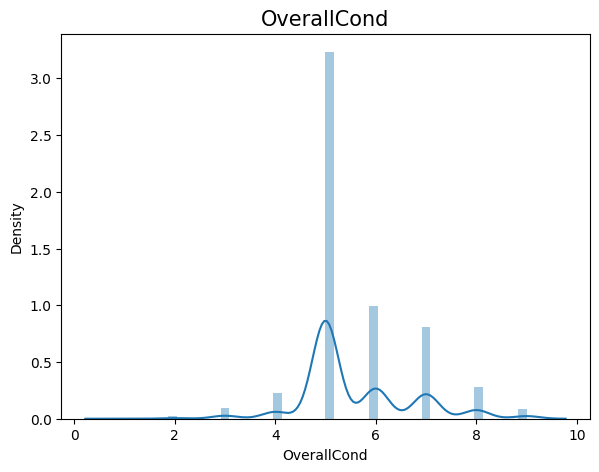

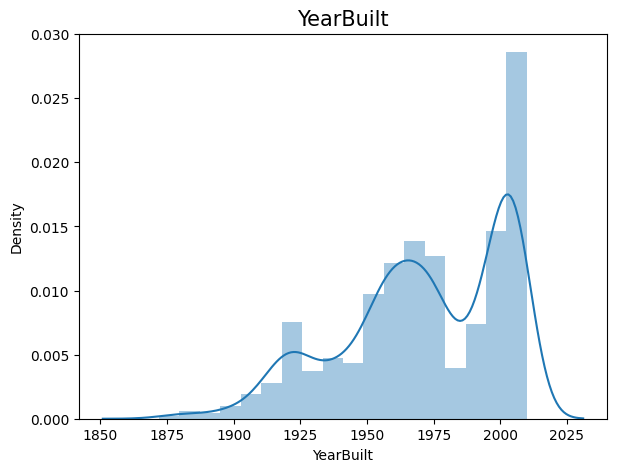

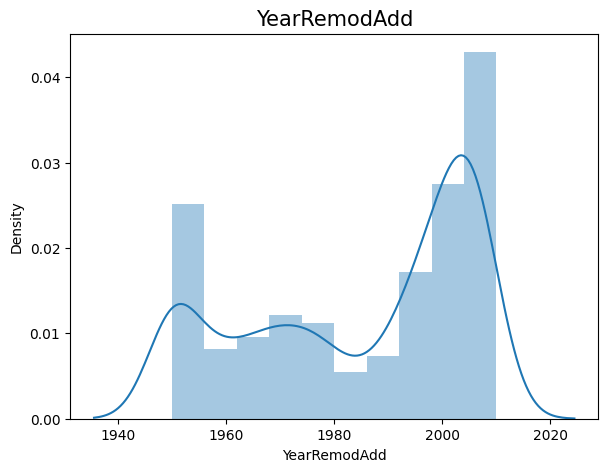

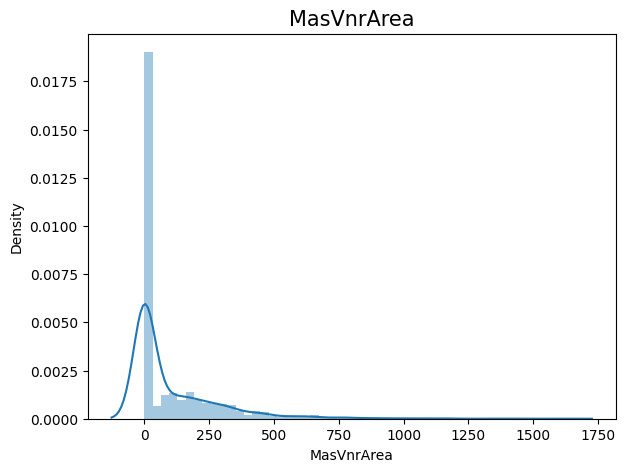

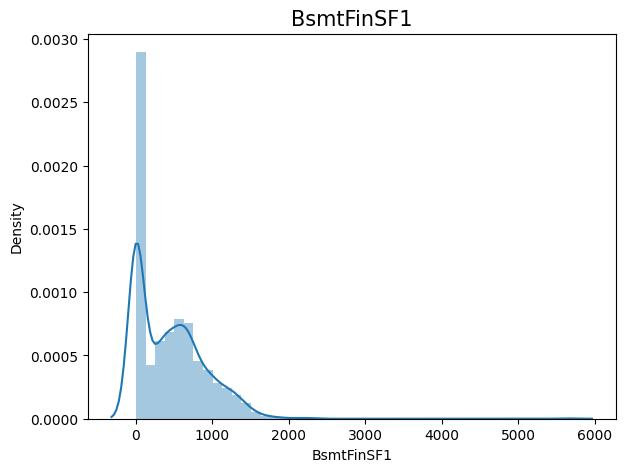

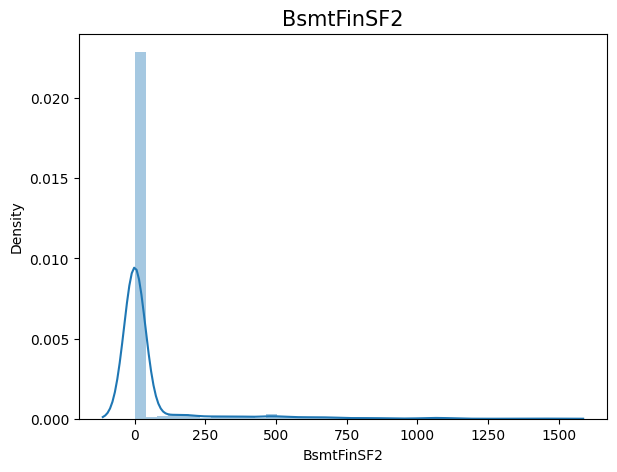

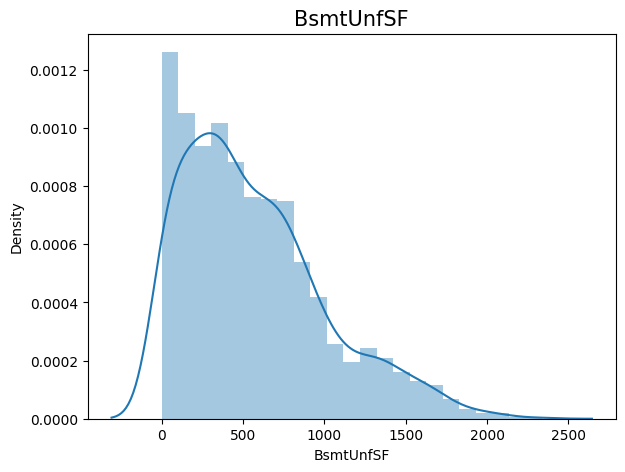

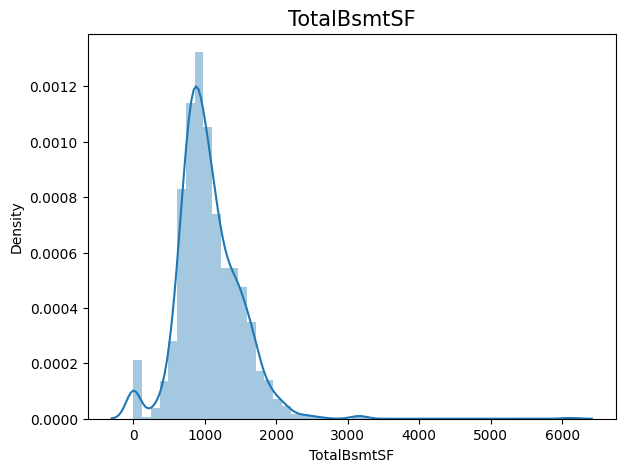

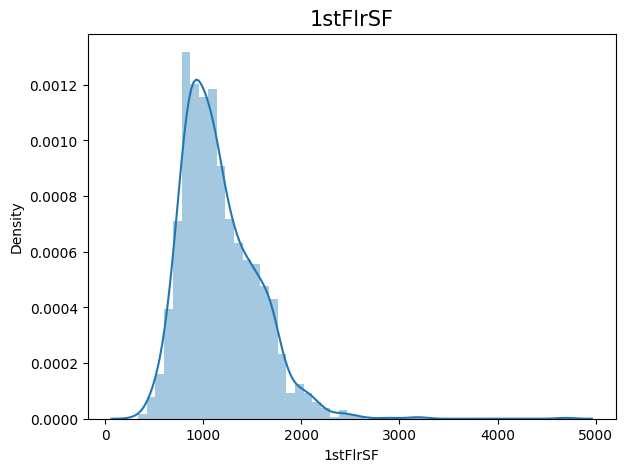

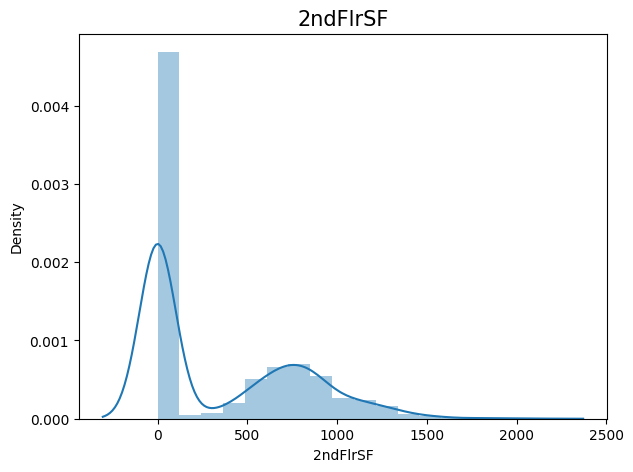

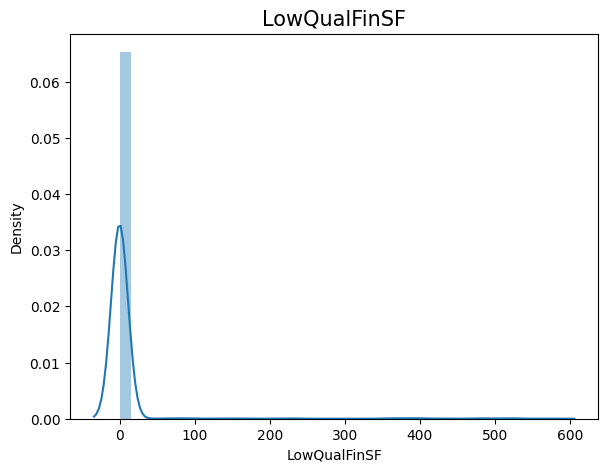

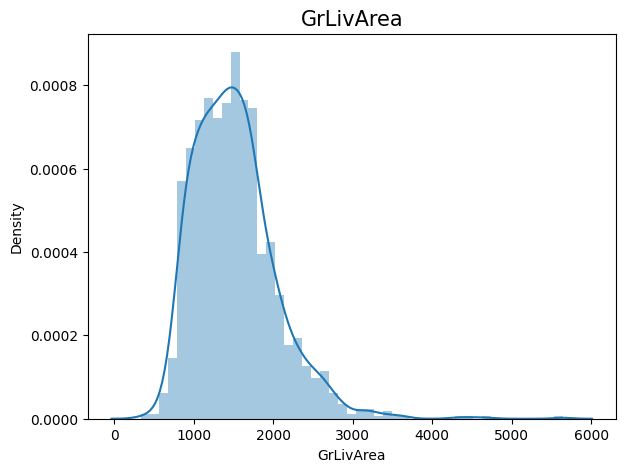

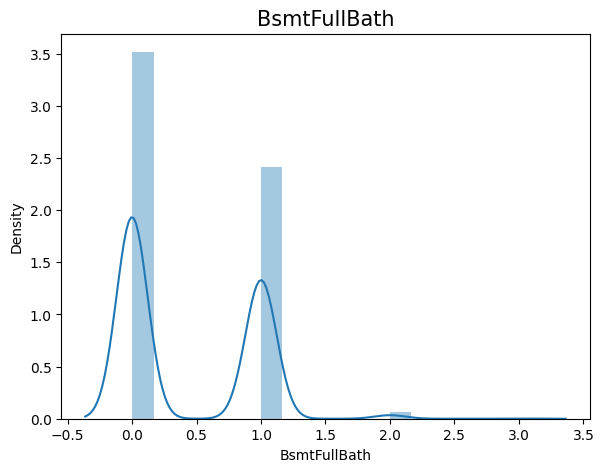

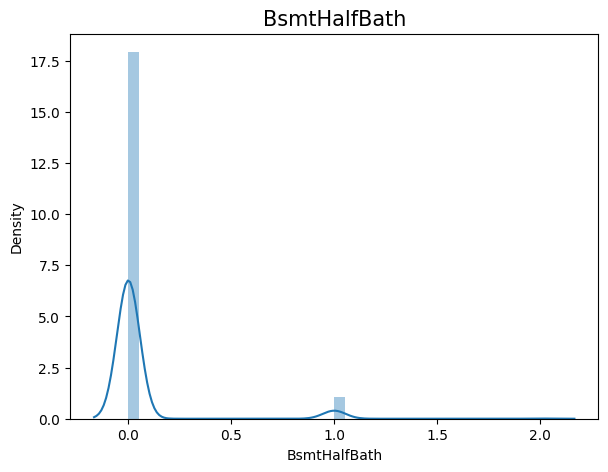

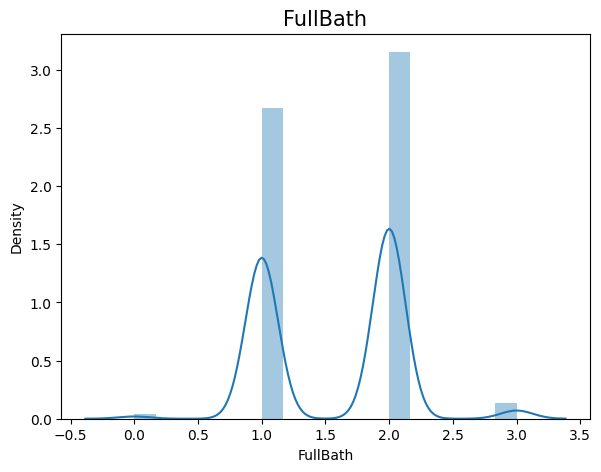

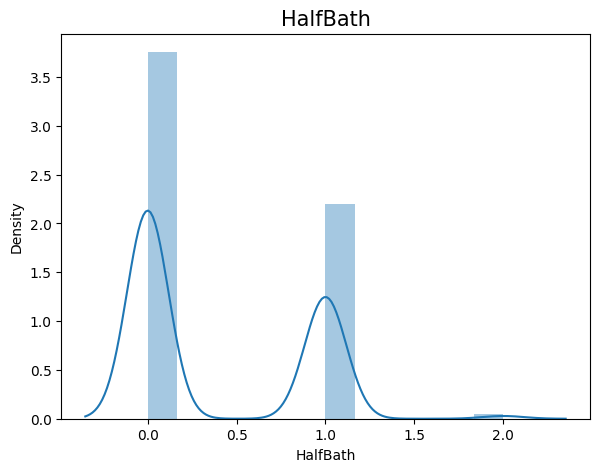

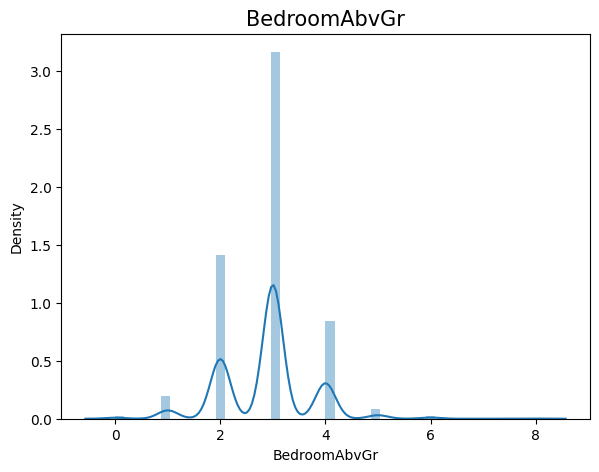

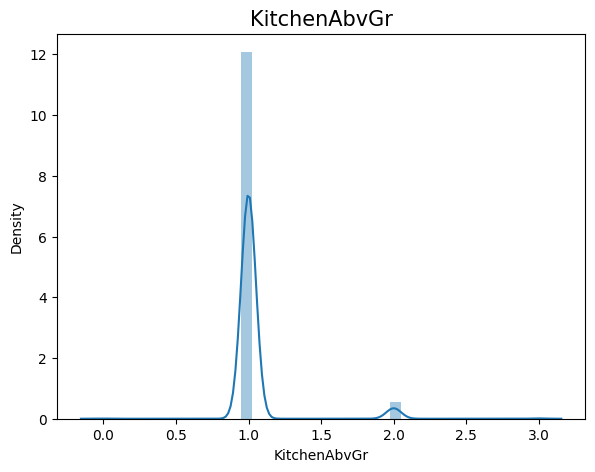

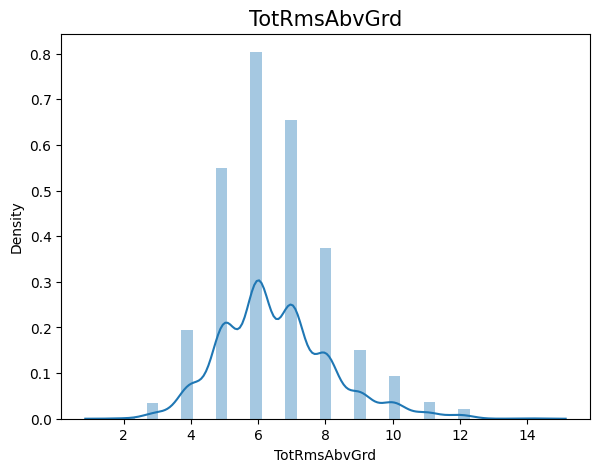

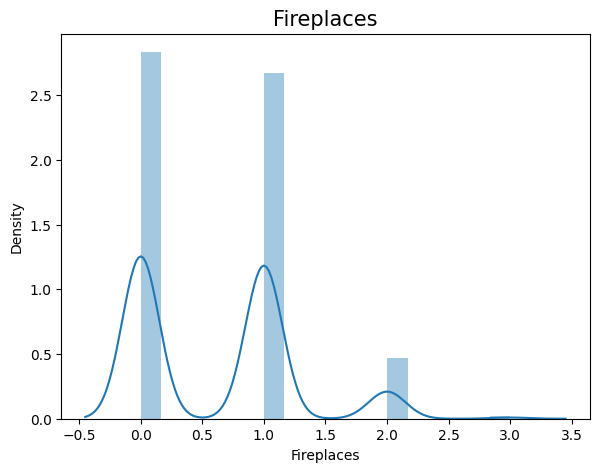

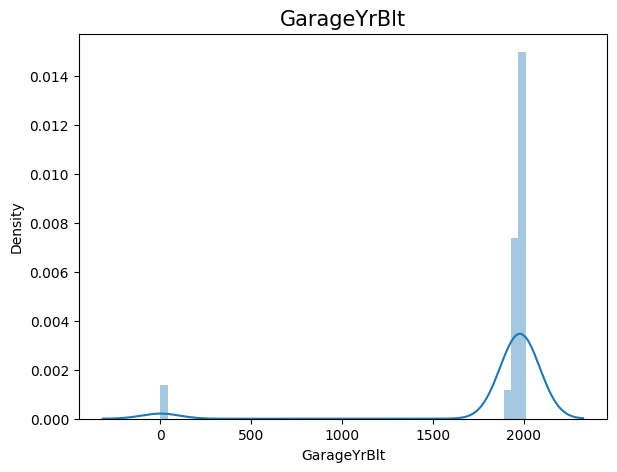

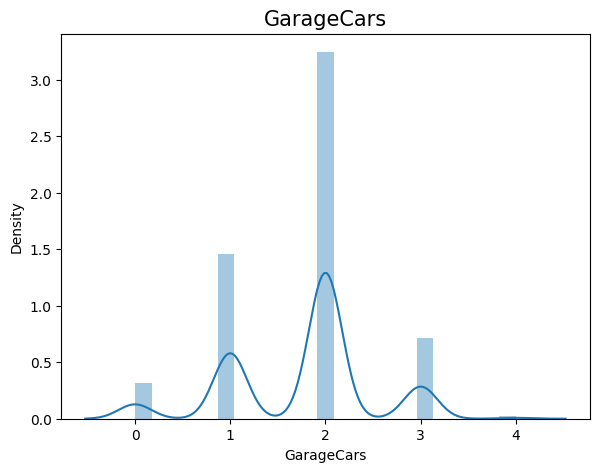

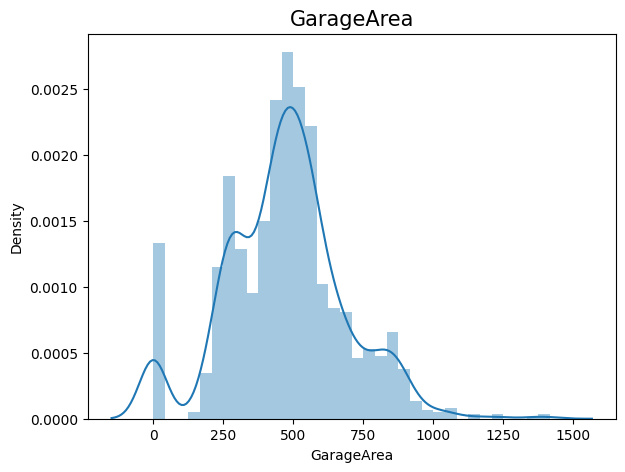

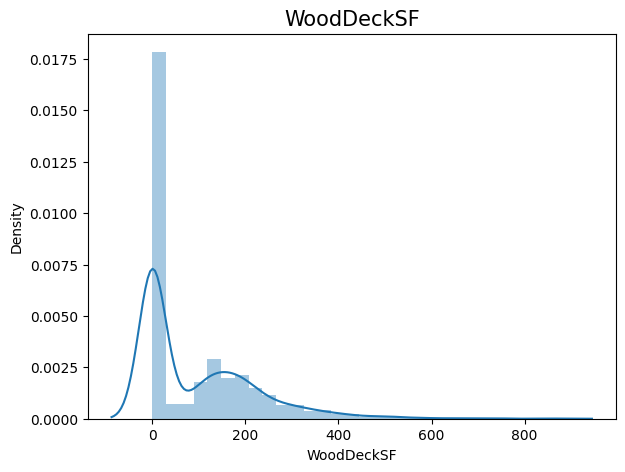

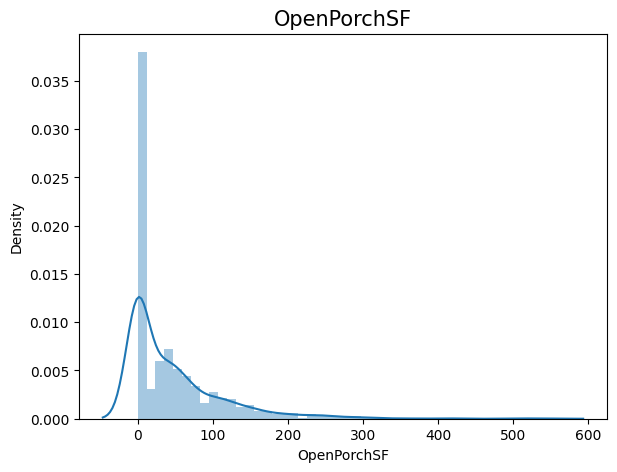

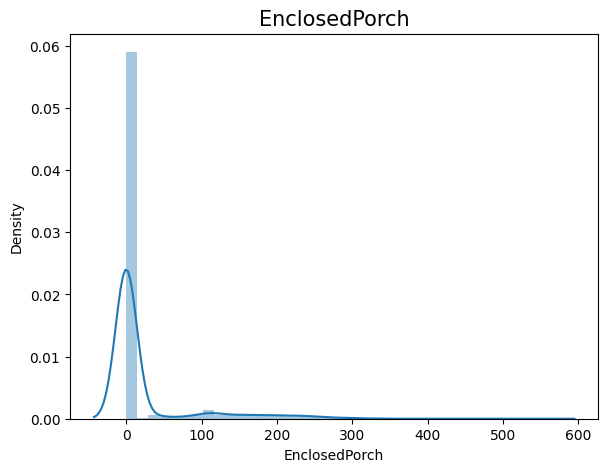

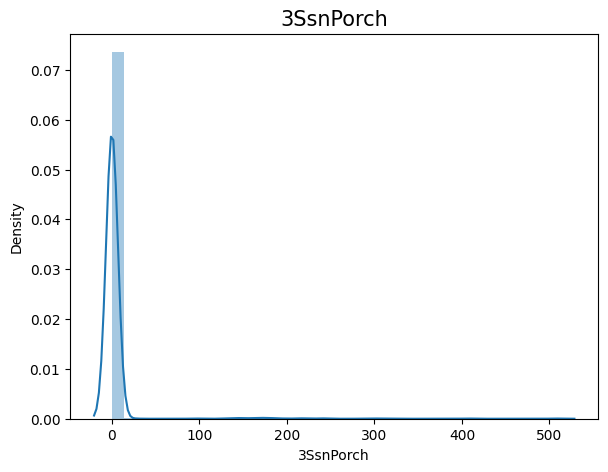

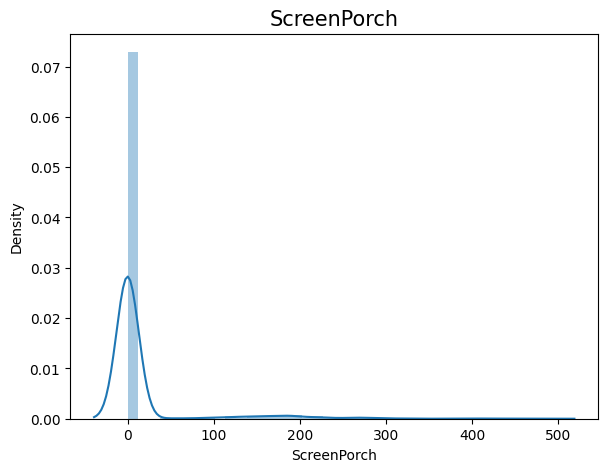

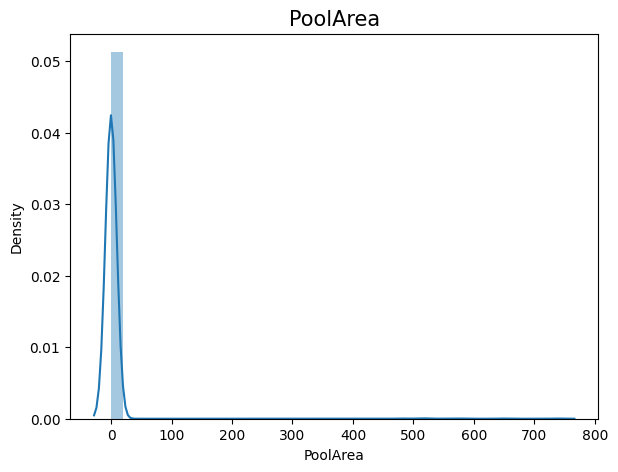

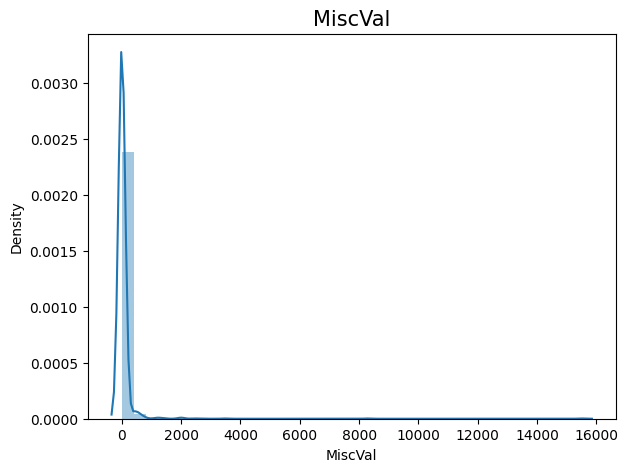

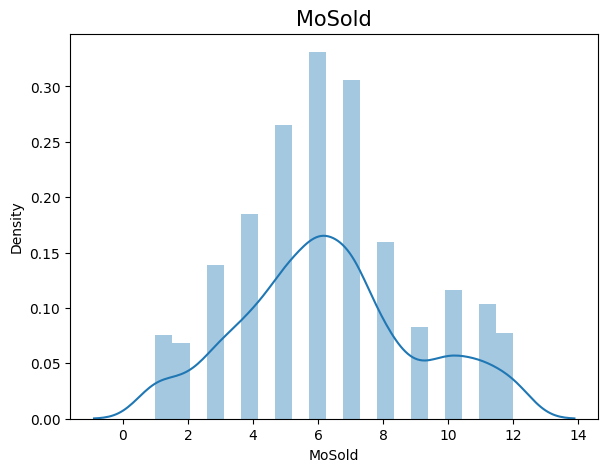

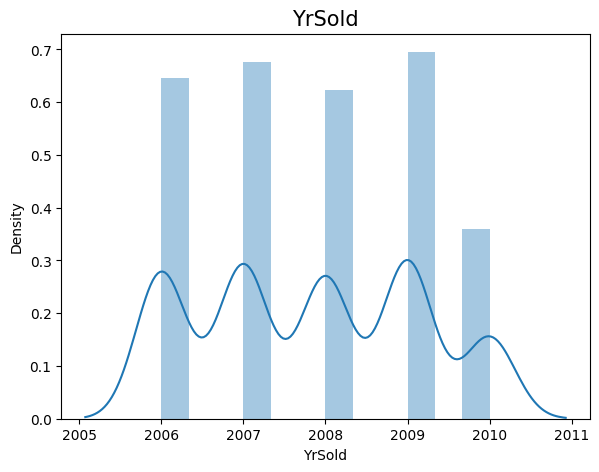

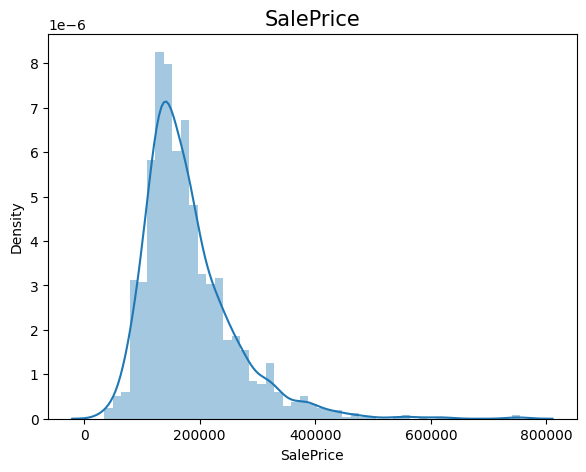

In [40]:
#Check the histogram for univariate analysis
for col in numerical_col:
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,2)
    plt.title(col, fontdict={'fontsize': 15})
    sns.distplot(input_df[col])

##### Observation : 
- Most of the numerical columns are skewed and it doesn't have normal distribution. 
- LotFrontage, LotArea, MasVnrArea, BsmtFinSF1 are some of the variables with sknewness.
- Remove the outliers and handle the skewness

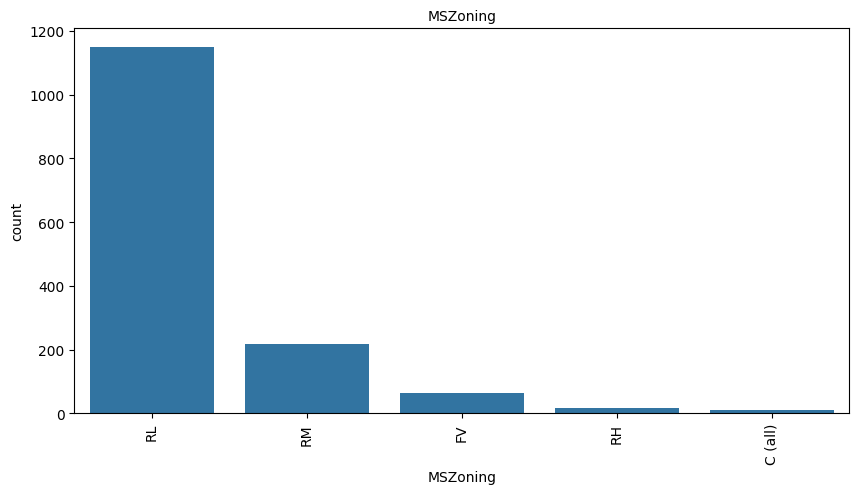

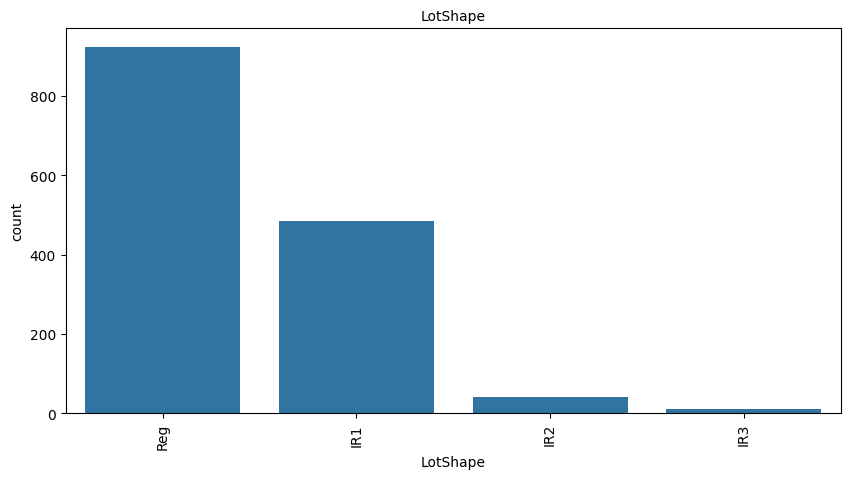

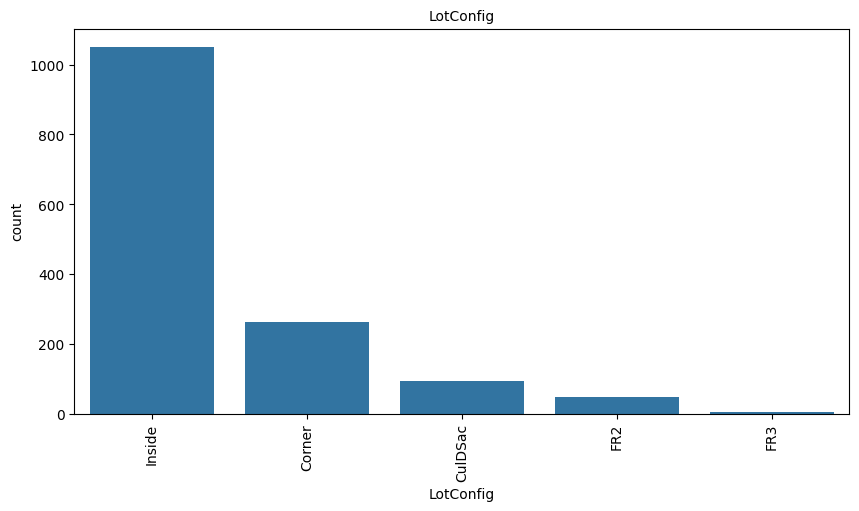

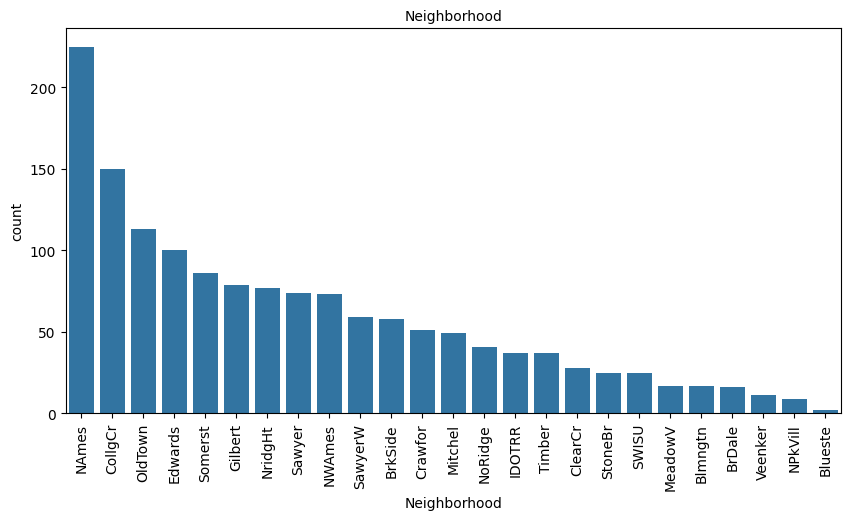

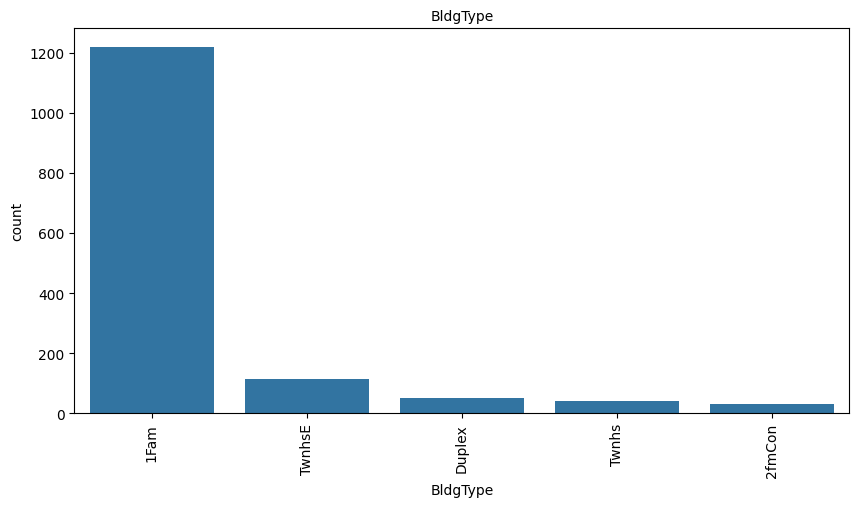

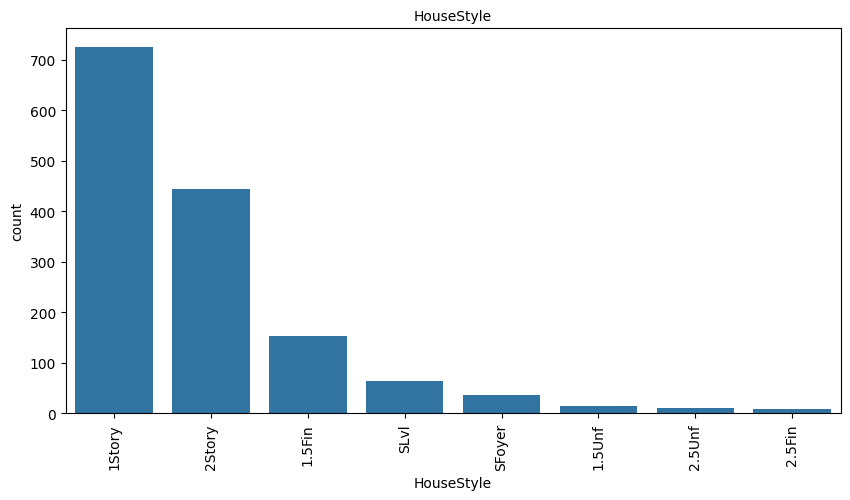

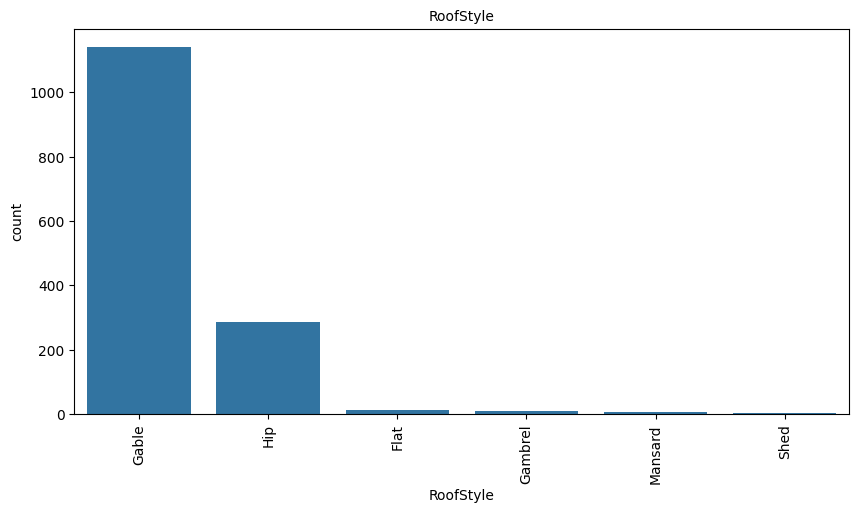

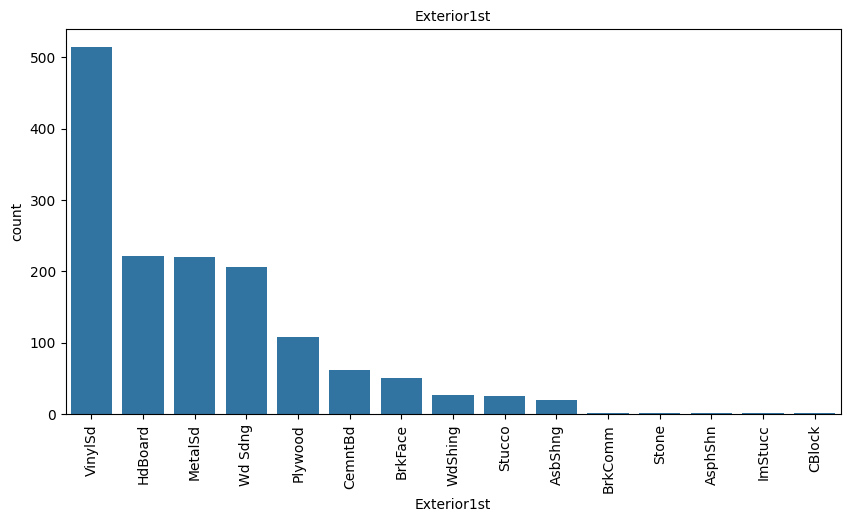

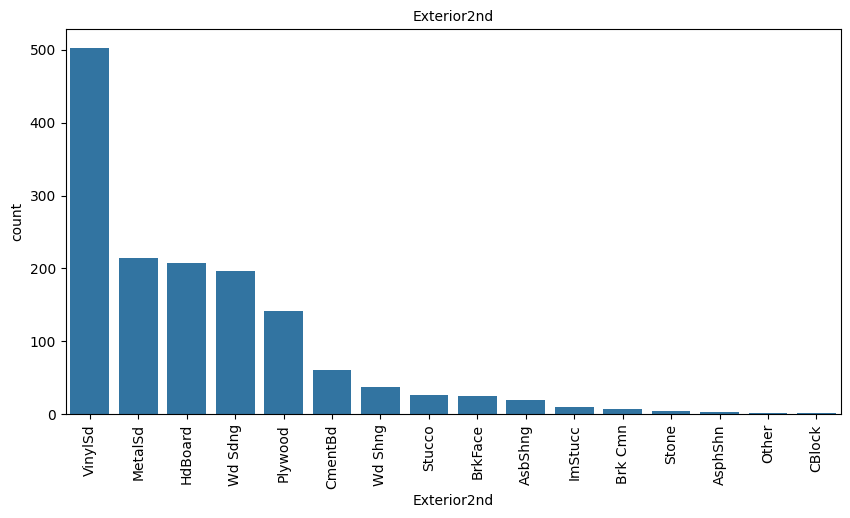

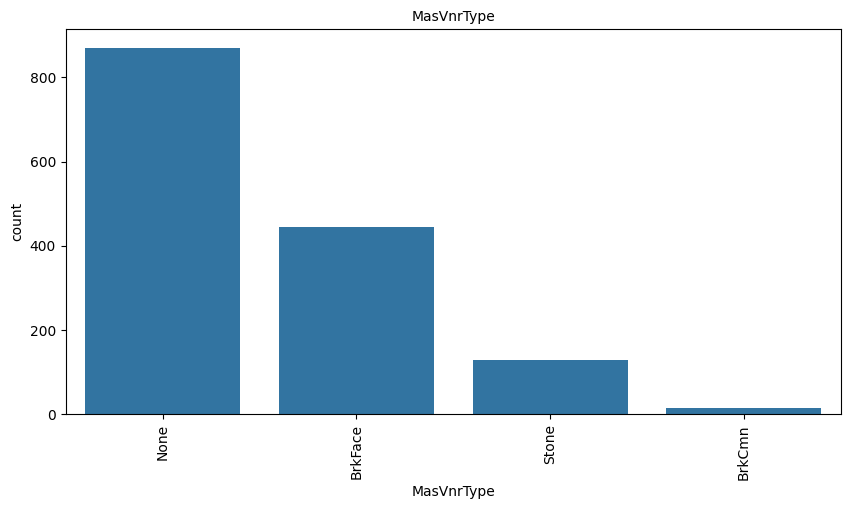

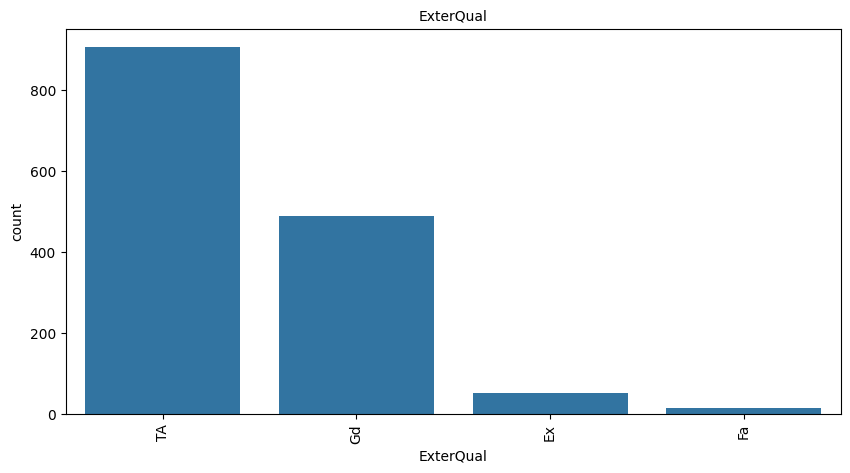

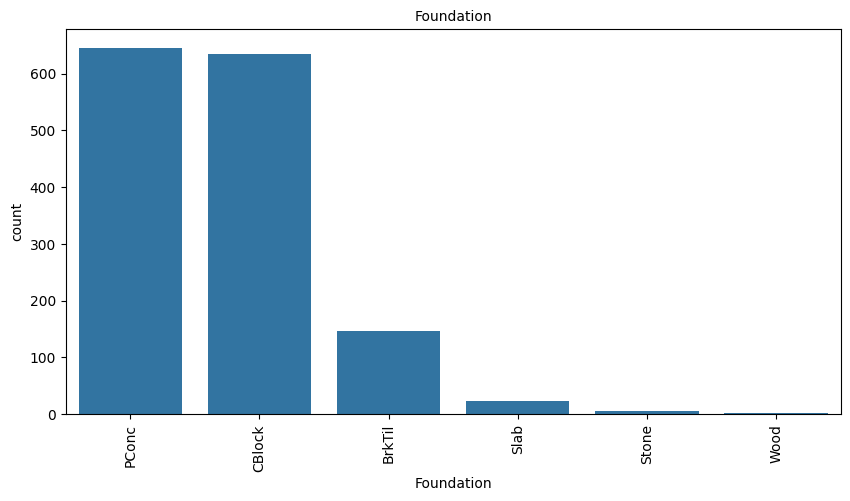

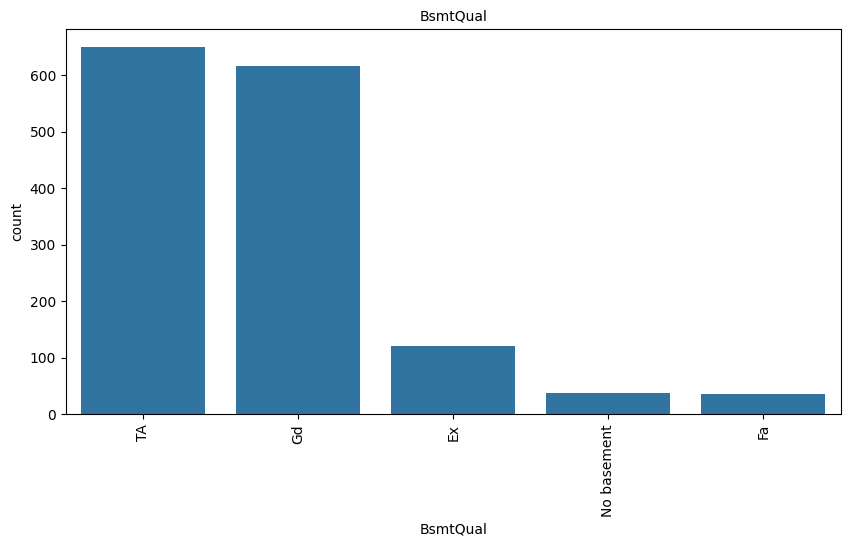

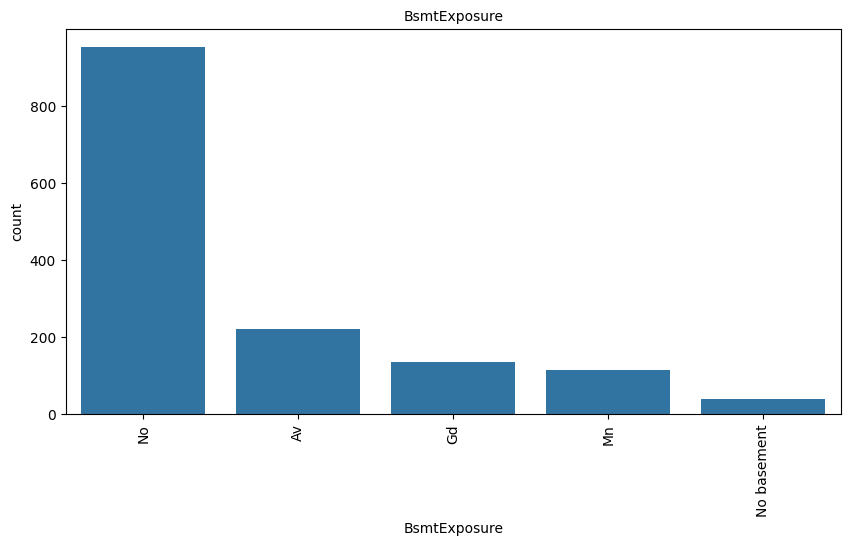

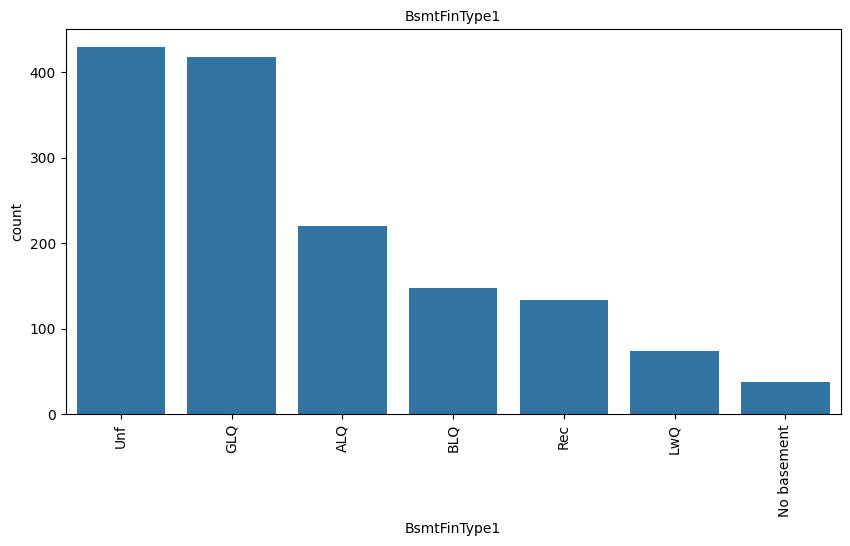

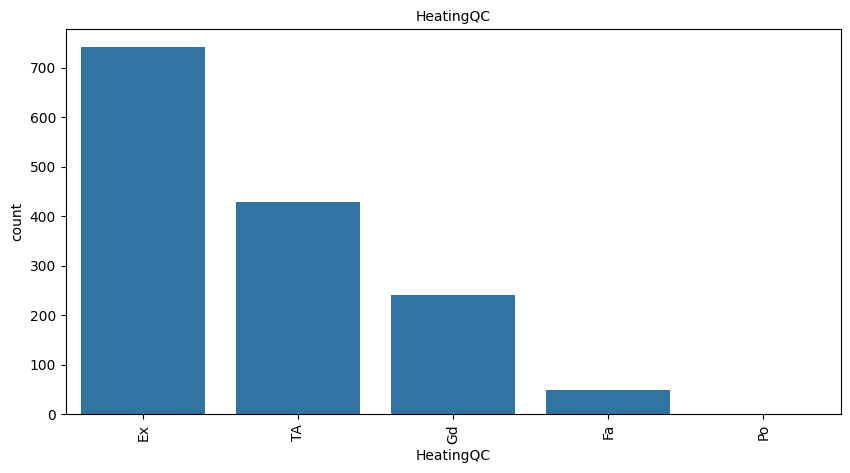

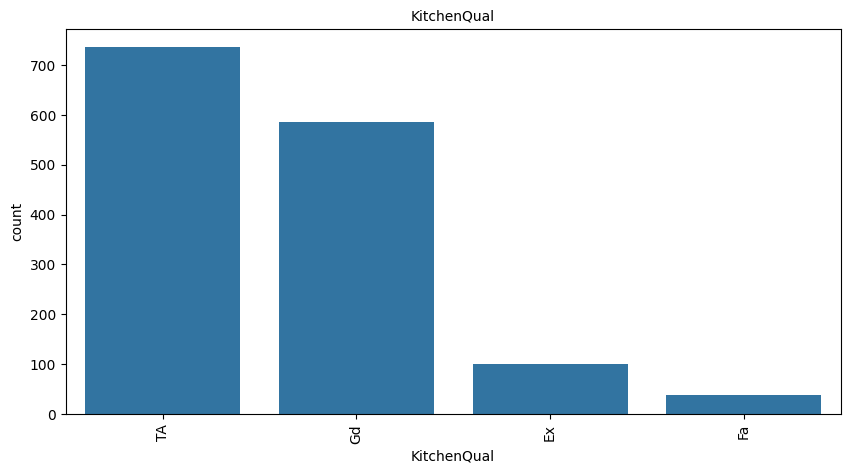

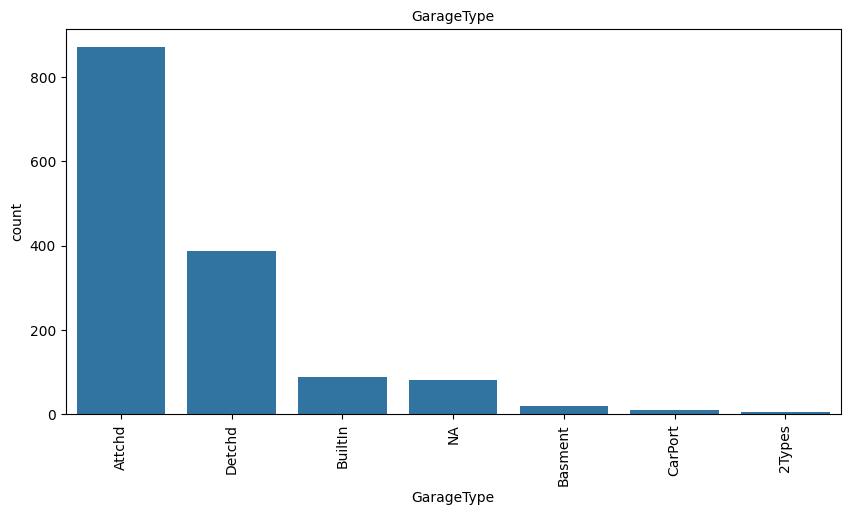

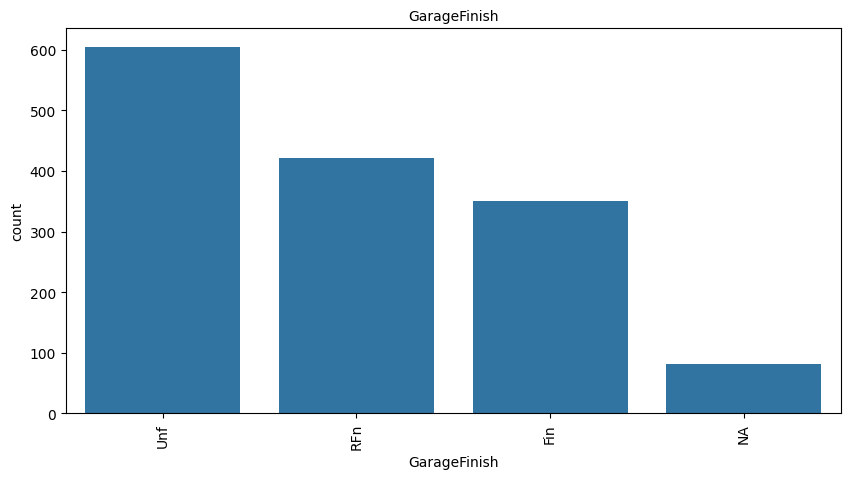

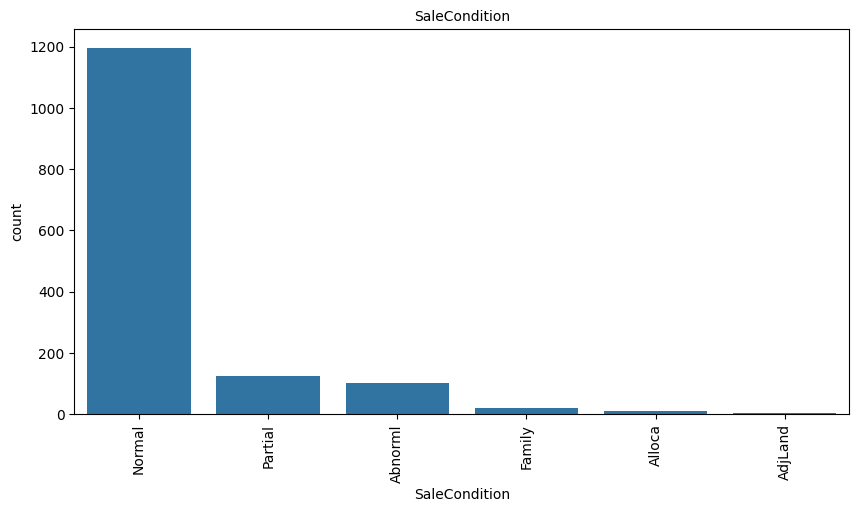

In [41]:
#Check the histogram values for categorical values
for col in categorical_col:
    plt.figure(figsize=(10,5))
    plt.xticks(rotation=90)
    plt.title(col, fontdict={'fontsize': 10})
    sns.barplot(x = input_df[col].value_counts().index, y = input_df[col].value_counts())
    plt.show()

##### Observation :
- As per the above graphs, few of the columns has single values dominating the group of values
- SaleCondition has skewed data for "Normal" so need to drop the column. 
- BldgType has skewed data for "1Fam" so need to drop the column. 
- BsmtExposure has skewed data for "No" so need to drop the column.


In [42]:
input_df.drop("SaleCondition", axis = 1, inplace=True)
input_df.drop("BldgType", axis = 1, inplace=True)
input_df.drop("BsmtExposure", axis = 1, inplace=True)


### Bivariate analysis

<Axes: >

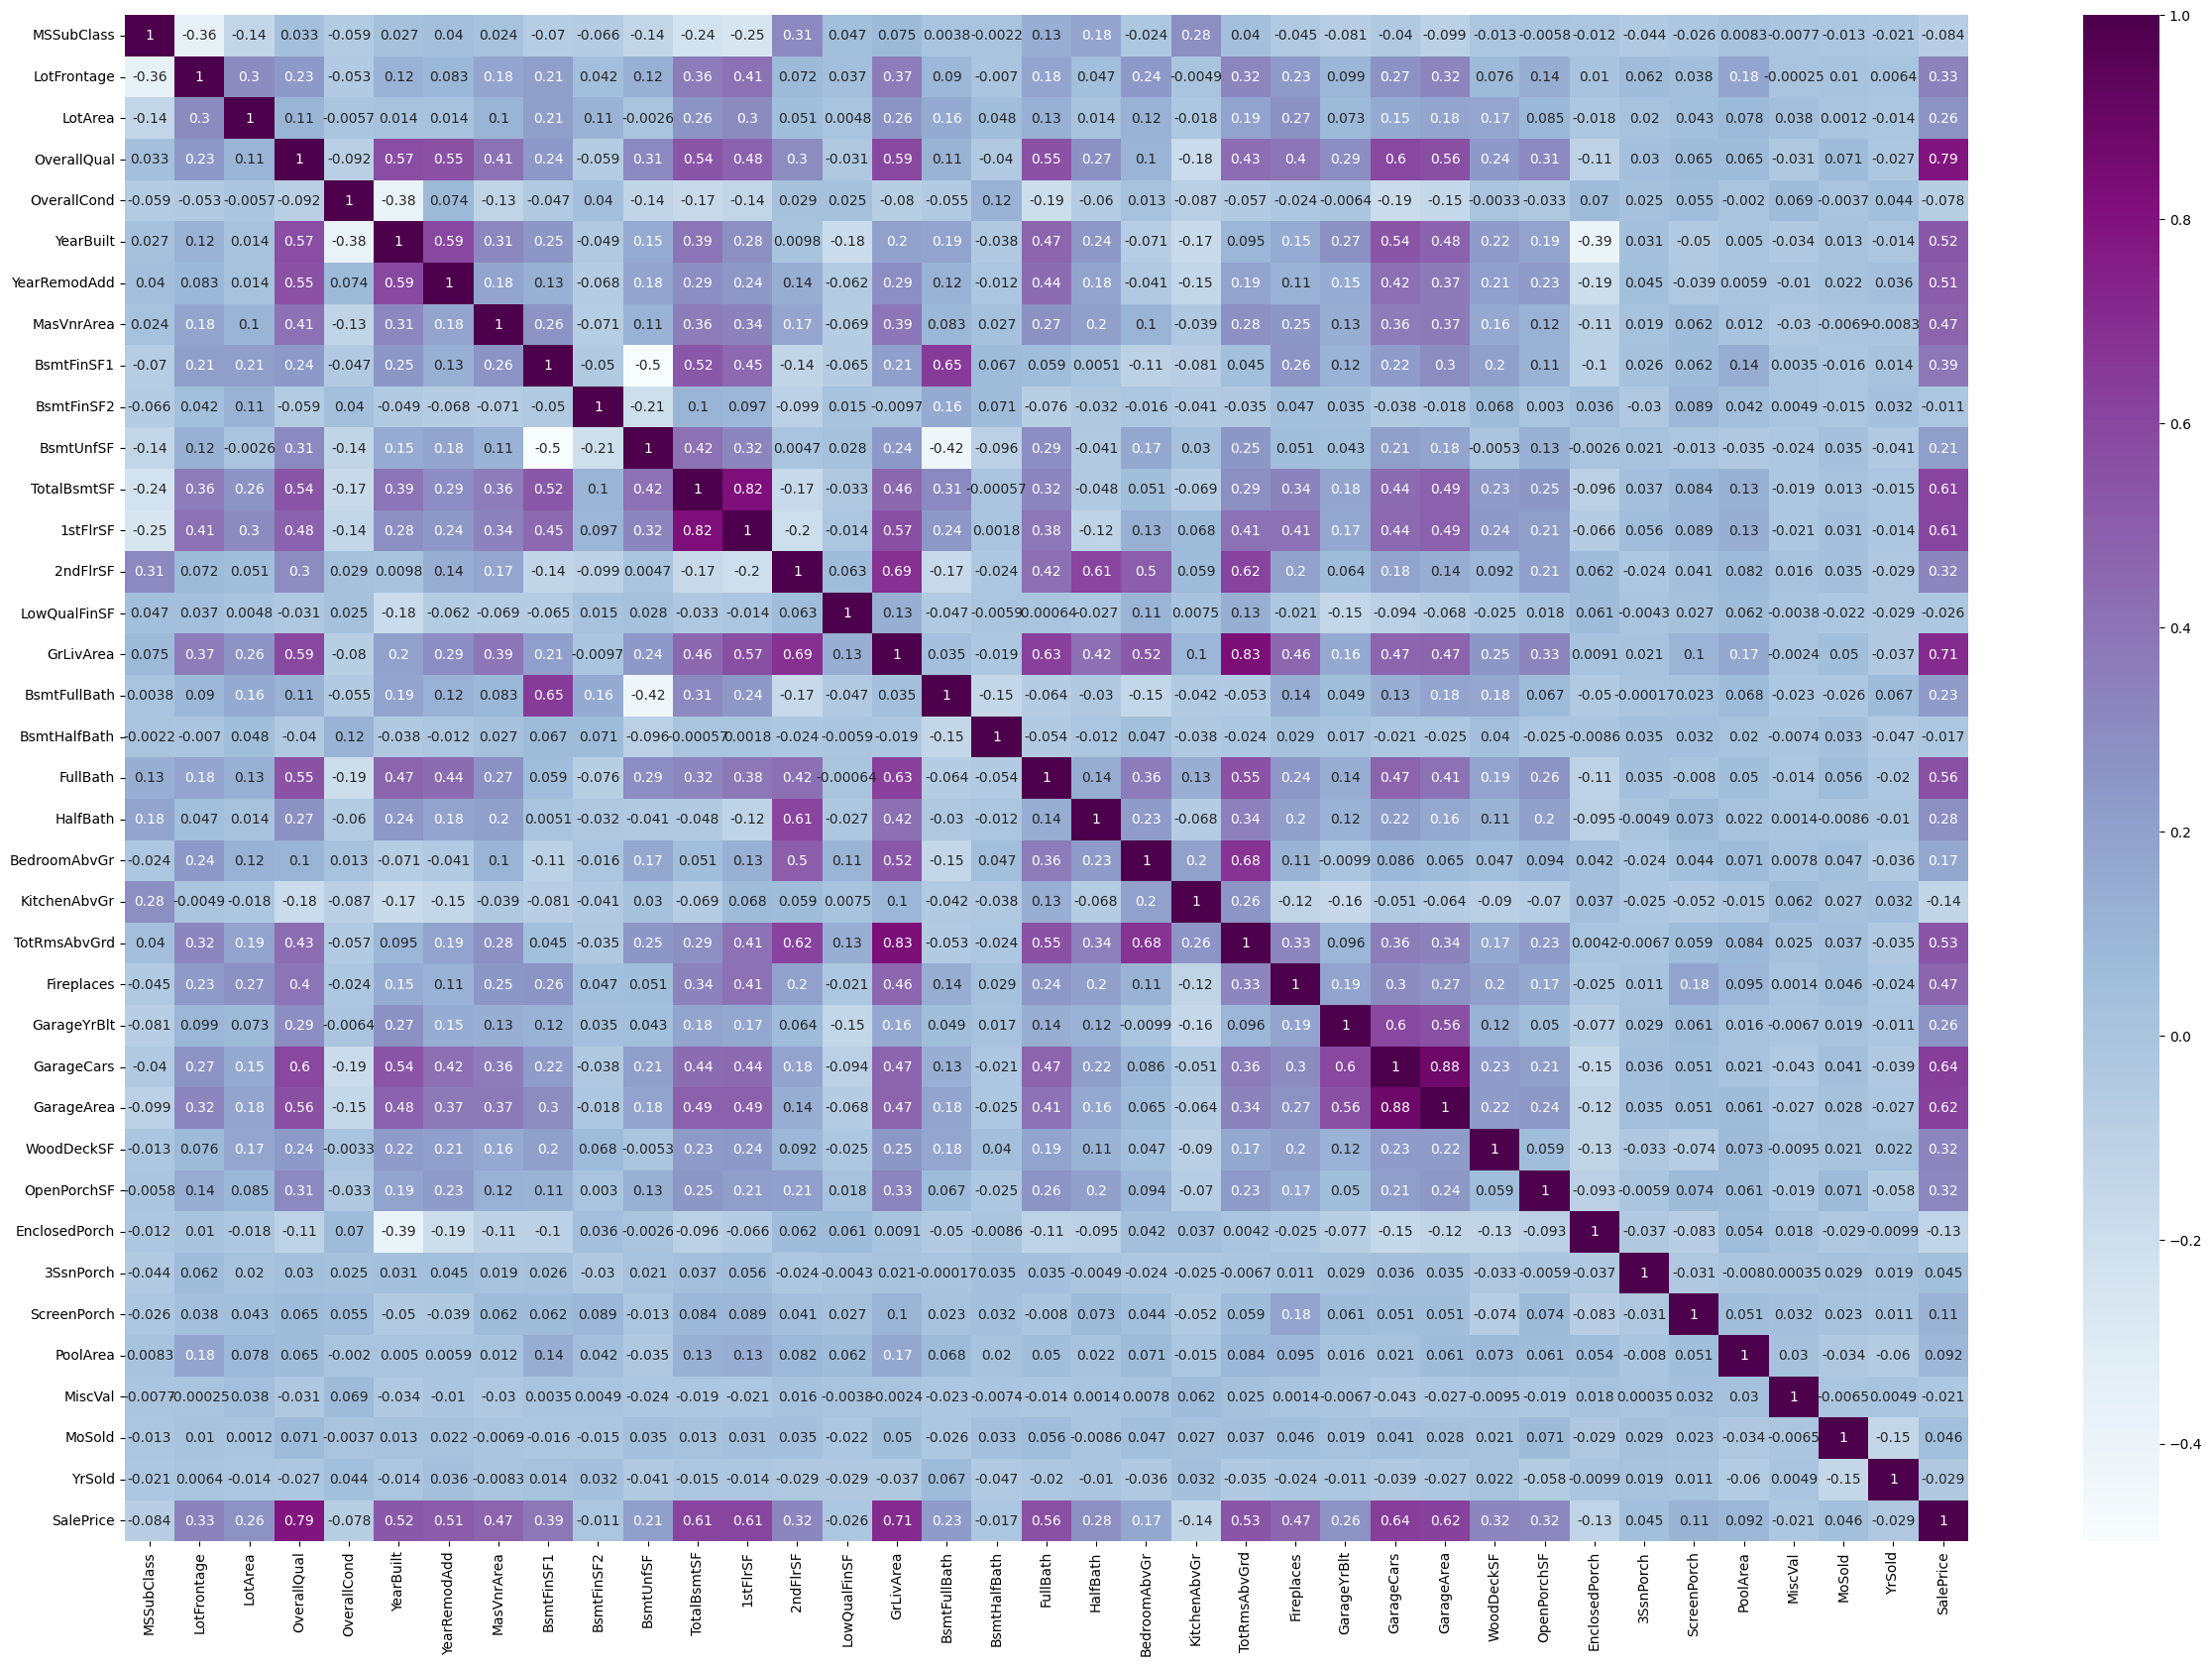

In [43]:
# Plot heatmap to detect correlations among numerical variables
plt.figure(figsize=(30,20))
sns.heatmap(input_df[numerical_col].corr(), annot=True, cmap='BuPu')

##### Observation : 
- The following coliumns are highly correlated : 
1stFlrSF, TotBsmtSF
GarageCars, GarageArea
YearRemodAdd, YearBuilt

In [44]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 1 to 1460
Data columns (total 54 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   LotShape       1459 non-null   object 
 5   LotConfig      1459 non-null   object 
 6   Neighborhood   1459 non-null   object 
 7   HouseStyle     1459 non-null   object 
 8   OverallQual    1459 non-null   int64  
 9   OverallCond    1459 non-null   int64  
 10  YearBuilt      1459 non-null   int64  
 11  YearRemodAdd   1459 non-null   int64  
 12  RoofStyle      1459 non-null   object 
 13  Exterior1st    1459 non-null   object 
 14  Exterior2nd    1459 non-null   object 
 15  MasVnrType     1459 non-null   object 
 16  MasVnrArea     1459 non-null   float64
 17  ExterQual      1459 non-null   object 
 18  Foundation   

In [45]:
categorical_col = []
numerical_col = []

for col in list(input_df):
    if input_df[col].dtypes == 'object':
        categorical_col.append(col)  
    else:
        numerical_col.append(col)

In [46]:
categorical_col

['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'GarageType',
 'GarageFinish']

In [47]:
numerical_col

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [48]:
# Create dummy variables for the categorical columns
df_dummy = pd.get_dummies(input_df[categorical_col], drop_first=True)

In [49]:
#Concating the dataframe with dummies with the the original dataframe (df_dropped)
df_concat = pd.concat([input_df, df_dummy], axis=1)
df_concat.shape

(1459, 167)

In [50]:
#Dropping all the original columns after creating dummies
df_final = df_concat.drop(categorical_col, axis = 1)
df_final.shape

(1459, 150)

<Axes: xlabel='SalePrice', ylabel='Density'>

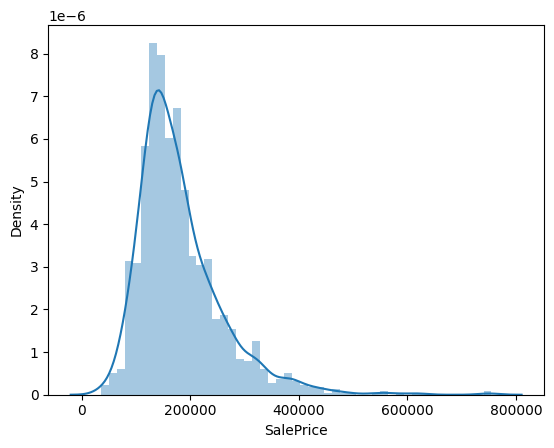

In [51]:
#Checking distribution for target variable
sns.distplot(df_final['SalePrice'])

In [52]:
df_final['SalePrice'].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count      1459.000000
mean     180930.394791
std       79468.964025
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
90%      278000.000000
95%      326200.000000
99%      442629.620000
max      755000.000000
Name: SalePrice, dtype: float64

In [53]:
#creating normal distribution for the target variable
df_final['SalePrice']=np.log(df_final.SalePrice) 

<Axes: xlabel='SalePrice', ylabel='Density'>

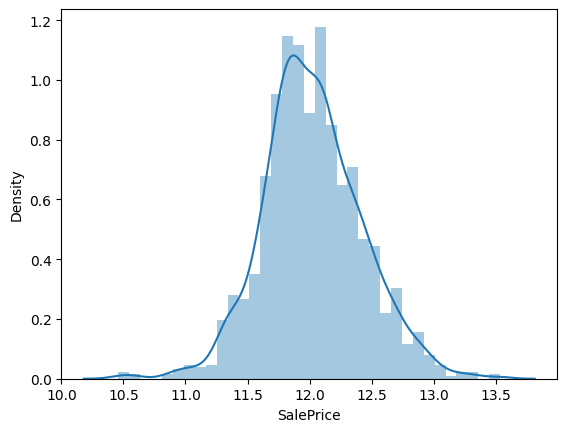

In [54]:
sns.distplot(df_final['SalePrice']) 

##### Observation : 
- The normal distribution is formed for the target variable. 

## Step 4 : Model preparation 

In [55]:
# Extracting X and y values
X = df_final.drop('SalePrice', axis=1)
y = df_final['SalePrice']

In [56]:
# Splitting the test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=75)

In [57]:
#Using the standard scalaer to fit the transformation
scaler = StandardScaler()
numerical_col.remove('SalePrice')
X_train[numerical_col] = scaler.fit_transform(X_train[numerical_col])
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No basement,BsmtQual_TA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
246,-0.883592,0.505518,0.009116,0.655725,-0.513487,0.564545,0.163720,-0.012666,1.111912,-0.294107,0.810014,1.906989,1.900305,-0.796751,-0.121731,0.667754,-0.832671,4.002230,0.786223,-0.748798,0.174252,-0.225200,-0.319692,0.616746,0.261886,0.308886,0.623407,0.852847,-0.146673,-0.352381,-0.114969,-0.277041,-0.069554,-0.103329,-0.148047,-1.380872,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False
618,-0.297020,-0.489964,-0.341858,-0.069622,0.375107,-0.535024,-1.473668,-0.575395,-1.016668,-0.294107,0.615719,-0.550504,-0.899792,-0.796751,-0.121731,-1.322366,-0.832671,-0.241048,-1.013629,-0.748798,-1.027853,-0.225200,-1.542184,-0.938064,0.204248,0.308886,0.264457,-0.742673,-0.703059,-0.352381,-0.114969,-0.277041,-0.069554,-0.103329,-0.148047,0.146615,False,False,True,False,False,False,True,False,False,False,False,False,Fal

In [58]:
# Tranforming the test data 
X_test[numerical_col] = scaler.transform(X_test[numerical_col])
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No basement,BsmtQual_TA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
277,-0.883592,2.828308,-0.124062,0.655725,-0.513487,1.049649,0.886097,-0.575395,-1.016668,-0.294107,2.299610,1.215592,1.060276,-0.796751,-0.121731,0.070718,-0.832671,-0.241048,0.786223,-0.748798,0.174252,-0.225200,0.291554,-0.938064,0.295138,0.308886,0.476993,0.067236,1.436887,-0.352381,-0.114969,-0.277041,-0.069554,-0.103329,-0.887197,1.674101,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
571,0.758809,0.221094,0.307880,-0.794969,-0.513487,-0.179281,-0.943925,0.020436,-0.487387,-0.294107,2.153888,1.623152,1.512599,-0.796751,-0.121731,0.392199,-0.832671,-0.241048,0.786223,-0.748798,3.780568,4.113083,2.125293,-0.938064,0.259669,0.308886,0.491162,-0.742673,-0.703059,-0.352381,-0.114969,-0.277041,-0.069554,-0.103329,1.699828,0.146615,False,False,True,False,False,False,False,False,False,False,True,False,False,Fals

### Ridge regression

In [59]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [60]:
# Check the results for ridge
cv_results = pd.DataFrame(ridge_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021042,0.009991,0.009680,0.001928,0.0001,{'alpha': 0.0001},0.863253,0.825604,0.922911,0.919407,0.845854,0.875406,0.039228,26,0.930303,0.935814,0.920417,0.921355,0.934335,0.928445,0.006437
1,0.016606,0.003155,0.009939,0.002215,0.001,{'alpha': 0.001},0.863297,0.825742,0.922957,0.919423,0.845949,0.875473,0.039190,25,0.930303,0.935814,0.920417,0.921355,0.934335,0.928445,0.006437
2,0.017673,0.002746,0.008228,0.004132,0.01,{'alpha': 0.01},0.863667,0.826881,0.923345,0.919578,0.846836,0.876061,0.038874,24,0.930294,0.935806,0.920408,0.921352,0.934329,0.928438,0.006436
3,0.020402,0.002927,0.008786,0.001883,0.05,{'alpha': 0.05},0.864709,0.829715,0.924329,0.920196,0.849877,0.877765,0.038015,23,0.930209,0.935721,0.920317,0.921308,0.934239,0.928359,0.006428
4,0.028381,0.006039,0.009974,0.001502,0.1,{'alpha': 0.1},0.865590,0.831674,0.924916,0.920822,0.852440,0.879088,0.037369,22,0.930086,0.935584,0.920186,0.921202,0.934061,0.928224,0.006413
5,0.025524,0.002969,0.011426,0.000856,0.2,{'alpha': 0.2},0.866892,0.834066,0.925442,0.921743,0.855454,0.880719,0.036576,21,0.929808,0.935254,0.919909,0.920909,0.933627,0.927901,0.006376
6,0.048109,0.020416,0.021887,0.006636,0.3,{'alpha': 0.3},0.867884,0.835589,0.925670,0.922390,0.857053,0.881717,0.036093,20,0.929510,0.934898,0.919623,0.920573,0.933180,0.927557,0.006341
7,0.050085,0.009429,0.023253,0.008329,0.4,{'alpha': 0.4},0.868694,0.836675,0.925784,0.922873,0.857956,0.882396,0.035767,18,0.929210,0.934545,0.919340,0.920230,0.932757,0.927217,0.006313
8,0.048142,0.006858,0.017089,0.004956,0.5,{'alpha': 0.5},0.869383,0.837500,0.925845,0.923245,0.858475,0.882890,0.035531,17,0.928918,0.934207,0.919064,0.919894,0.932369,0.926890,0.006291
9,0.037298,0.006045,0.018330,0.007624,0.6,{'alpha': 0.6},0.869986,0.838157,0.925876,0.923542,0.858770,0.883266,0.035353,16,0.928637,0.933886,0.918797,0.919570,0.932013,0.926581,0.006274


In [61]:
## View the optimal value of alpha
ridge_cv.best_params_

{'alpha': 8.0}

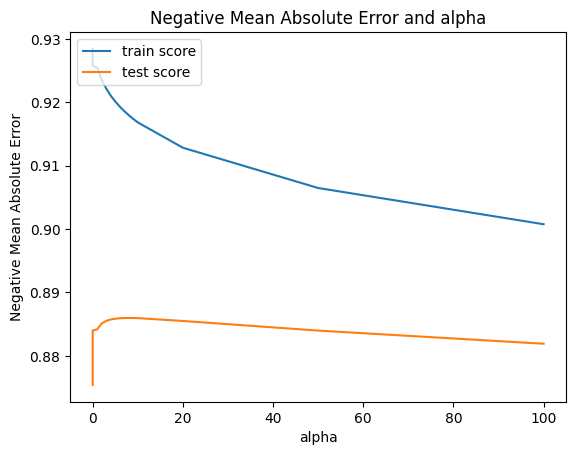

In [62]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [63]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=20)

In [64]:
# View coefficients for each parameter
model_parameters_ridge = list(sorted(ridge.coef_))
model_parameters_ridge.insert(0, ridge.intercept_)
model_parameters_ridge = [round(x, 5) for x in model_parameters_ridge]
cols = X.columns
cols = cols.insert(0, "constant")
model_parameters_ridge = list((zip(cols, model_parameters_ridge)))

In [65]:
## Define a function for checking multiple metrics for each model 
def show_metrics(y_train, y_train_pred, y_test, y_pred):
    
    ## Create a list to save all metrics (will be used in creating a final summary in the end)
    metric = {}
    
    ## R-squared of train and test data
    print("R-Squared (Train) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric["R-Squared (Train)"] = r2_score(y_train, y_train_pred)
    print("R-Squared (Test) =", '%.2f' % r2_score(y_test, y_pred))
    metric["R-Squared (Test)"] = r2_score(y_test, y_pred)
    
    ## Residual sum of squares of train and test data
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric["RSS (Train)"] = rss_train
    rss_test = np.sum(np.square(y_test - y_pred))
    metric["RSS (Test)"] = rss_test
    print("RSS (Train) =", '%.2f' % rss_train)
    print("RSS (Test) =", '%.2f' % rss_test)
    
    
    ## Mean Squared Error of train and test data
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric["MSE (Train)"] = mse_train
    mse_test = mean_squared_error(y_test, y_pred)
    metric["MSE (Test)"] = mse_test
    
    print("MSE (Train) =", '%.2f' % mse_train)
    print("MSE (Test) =", '%.2f' % mse_test)
    
    # Root Mean Squared Error for train and test datass
    rmse_train = mse_train**0.5
    metric["RMSE (Train)"] = rmse_train
    rmse_test = mse_test**0.5
    metric["RMSE (Test)"] = rmse_test
    print("RMSE (Train) =", '%.2f' % rmse_train) 
    print("RMSE (Test) =", '%.2f' % rmse_test) 
    

    return metric

In [66]:
#Predictions on training data
ridge_y_train_pred = ridge.predict(X_train)
ridge_y_pred = ridge.predict(X_test)

In [67]:
# Check the metrics for the train and test data
ridge_metrics = show_metrics(y_train, ridge_y_train_pred, y_test, ridge_y_pred)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.81
RSS (Train) = 14.56
RSS (Test) = 13.14
MSE (Train) = 0.01
MSE (Test) = 0.03
RMSE (Train) = 0.12
RMSE (Test) = 0.17


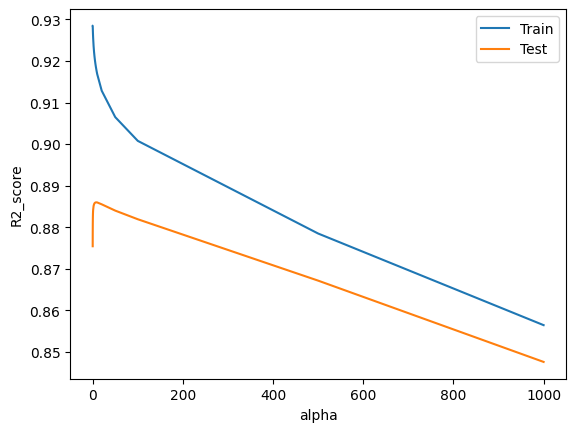

In [68]:
## Plotting R2 score vs alpha values
ridgeCV_results= pd.DataFrame(ridge_cv.cv_results_)
ridgeCV_results
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.legend()
plt.show()

##### Observation : 
- With the increase in alpha values the error on train set is decreaing
- Need to figure the optimal value of alpha whihc by graph comes around 5

### Lasso regression


In [69]:
# alphas for lasso regression
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

folds = 5
# Cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [70]:
# View the optimal value of alpha
lasso_cv.best_params_

{'alpha': 0.001}

In [71]:
# View the optimal value of alpha
lasso_cv_results = pd.DataFrame(lasso_cv.cv_results_)
lasso_cv_results = cv_results[cv_results['param_alpha']<=100]
lasso_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021042,0.009991,0.009680,0.001928,0,{'alpha': 0.0001},0.863253,0.825604,0.922911,0.919407,0.845854,0.875406,0.039228,26,0.930303,0.935814,0.920417,0.921355,0.934335,0.928445,0.006437
1,0.016606,0.003155,0.009939,0.002215,0,{'alpha': 0.001},0.863297,0.825742,0.922957,0.919423,0.845949,0.875473,0.039190,25,0.930303,0.935814,0.920417,0.921355,0.934335,0.928445,0.006437
2,0.017673,0.002746,0.008228,0.004132,0,{'alpha': 0.01},0.863667,0.826881,0.923345,0.919578,0.846836,0.876061,0.038874,24,0.930294,0.935806,0.920408,0.921352,0.934329,0.928438,0.006436
3,0.020402,0.002927,0.008786,0.001883,0,{'alpha': 0.05},0.864709,0.829715,0.924329,0.920196,0.849877,0.877765,0.038015,23,0.930209,0.935721,0.920317,0.921308,0.934239,0.928359,0.006428
4,0.028381,0.006039,0.009974,0.001502,0,{'alpha': 0.1},0.865590,0.831674,0.924916,0.920822,0.852440,0.879088,0.037369,22,0.930086,0.935584,0.920186,0.921202,0.934061,0.928224,0.006413
5,0.025524,0.002969,0.011426,0.000856,0,{'alpha': 0.2},0.866892,0.834066,0.925442,0.921743,0.855454,0.880719,0.036576,21,0.929808,0.935254,0.919909,0.920909,0.933627,0.927901,0.006376
6,0.048109,0.020416,0.021887,0.006636,0,{'alpha': 0.3},0.867884,0.835589,0.925670,0.922390,0.857053,0.881717,0.036093,20,0.929510,0.934898,0.919623,0.920573,0.933180,0.927557,0.006341
7,0.050085,0.009429,0.023253,0.008329,0,{'alpha': 0.4},0.868694,0.836675,0.925784,0.922873,0.857956,0.882396,0.035767,18,0.929210,0.934545,0.919340,0.920230,0.932757,0.927217,0.006313
8,0.048142,0.006858,0.017089,0.004956,0,{'alpha': 0.5},0.869383,0.837500,0.925845,0.923245,0.858475,0.882890,0.035531,17,0.928918,0.934207,0.919064,0.919894,0.932369,0.926890,0.006291
9,0.037298,0.006045,0.018330,0.007624,0,{'alpha': 0.6},0.869986,0.838157,0.925876,0.923542,0.858770,0.883266,0.035353,16,0.928637,0.933886,0.918797,0.919570,0.932013,0.926581,0.006274


In [72]:
# Create a ridge regression instance with optimum value alpha=0.001
lasso = Lasso(alpha=0.001)

In [73]:
# Fit the model on training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [74]:
# Predicting values for test and train 
lasso_y_train_pred = lasso.predict(X_train)
lasso_y_pred = lasso.predict(X_test)

In [75]:
# Checking the mtrics for train and test data
lasso_metrics = show_metrics(y_train, lasso_y_train_pred, y_test, lasso_y_pred)

R-Squared (Train) = 0.91
R-Squared (Test) = 0.80
RSS (Train) = 15.11
RSS (Test) = 13.56
MSE (Train) = 0.01
MSE (Test) = 0.03
RMSE (Train) = 0.12
RMSE (Test) = 0.18


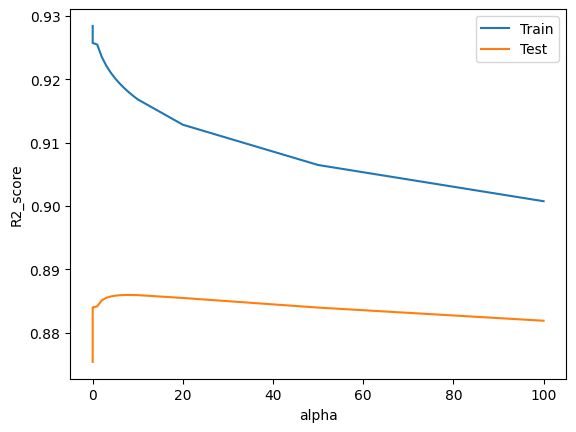

In [76]:
# Checking R2 and alpha score.
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'], label='Train')
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.legend()
plt.show()

##### Observation : 
- With the increase in alpha values the error on train set is decreaing
- Need to figure the optimal value of alpha whihc by graph comes around 5

In [77]:
# lasso model parameters
lasso_model_parameters = list(sorted(lasso.coef_))
lasso_model_parameters.insert(0, lasso.intercept_)
lasso_model_parameters = [round(x, 3) for x in lasso_model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_model_parameters = list((zip(cols, lasso_model_parameters)))
lasso_model_parameters

[('constant', 11.975),
 ('MSSubClass', -0.078),
 ('LotFrontage', -0.053),
 ('LotArea', -0.035),
 ('OverallQual', -0.019),
 ('OverallCond', -0.018),
 ('YearBuilt', -0.016),
 ('YearRemodAdd', -0.01),
 ('MasVnrArea', -0.01),
 ('BsmtFinSF1', -0.01),
 ('BsmtFinSF2', -0.009),
 ('BsmtUnfSF', -0.008),
 ('TotalBsmtSF', -0.007),
 ('1stFlrSF', -0.006),
 ('2ndFlrSF', -0.005),
 ('LowQualFinSF', -0.005),
 ('GrLivArea', -0.005),
 ('BsmtFullBath', -0.004),
 ('BsmtHalfBath', -0.002),
 ('FullBath', -0.001),
 ('HalfBath', -0.001),
 ('BedroomAbvGr', -0.001),
 ('KitchenAbvGr', -0.0),
 ('TotRmsAbvGrd', -0.0),
 ('Fireplaces', -0.0),
 ('GarageYrBlt', 0.0),
 ('GarageCars', 0.0),
 ('GarageArea', -0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', -0.0),
 ('3SsnPorch', -0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', -0.0),
 ('MiscVal', 0.0),
 ('MoSold', -0.0),
 ('YrSold', 0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', -0.0),
 

### Residual analysis

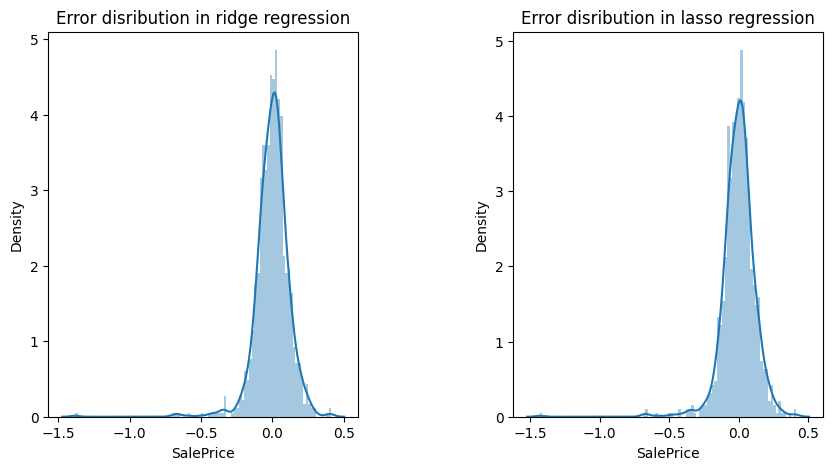

In [78]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.distplot((y_train - ridge_y_train_pred), bins = 100)
plt.title('Error disribution in ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_train - lasso_y_train_pred), bins = 100)
plt.title('Error disribution in lasso regression')

plt.subplots_adjust(wspace = .5)

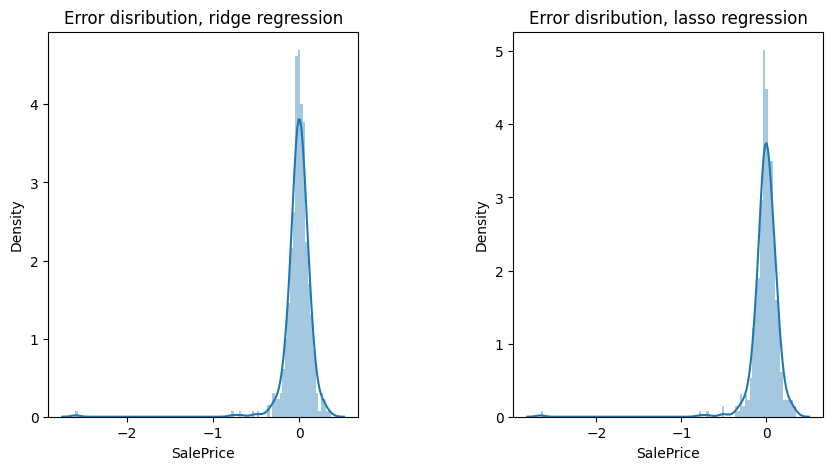

In [79]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.distplot((y_test - ridge_y_pred), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_test - lasso_y_pred), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

In [80]:
# All metrics for both models
ridgeMetricsDF = pd.DataFrame.from_dict(ridge_metrics, orient='index', columns=['Ridge'])
lassoMetricsDF = pd.DataFrame.from_dict(lasso_metrics, orient='index', columns=['Lasso'])
finalMetrics = ridgeMetricsDF.join(lassoMetricsDF)
finalMetrics

,Ridge,Lasso
R-Squared (Train),0.911119,0.907768
R-Squared (Test),0.809414,0.803407
RSS (Train),14.561708,15.110784
RSS (Test),13.143342,13.557612
MSE (Train),0.014262,0.014800
MSE (Test),0.030008,0.030953
RMSE (Train),0.119424,0.121655
RMSE (Test),0.173227,0.175936


In [81]:
# Coefficients for both models
coeff_df = pd.DataFrame(model_parameters_ridge, columns=["Column","Ridge_Coeff"])
coeff_df.set_index("Column",inplace=True)
coeff_df = coeff_df.join(pd.DataFrame(lasso_model_parameters, columns=["Column","Lasso_Coeff"]).set_index("Column"))

coeff_df = coeff_df.sort_values(by="Lasso_Coeff", ascending=False)

In [82]:
coeff_df['Lasso_Coeff'].sort_values(ascending=False)[:10]

Column
constant              11.975
GarageFinish_Unf       0.106
GarageFinish_RFn       0.096
GarageFinish_NA        0.094
GarageType_NA          0.089
GarageType_Detchd      0.079
GarageType_CarPort     0.066
GarageType_BuiltIn     0.063
GarageType_Basment     0.050
GarageType_Attchd      0.047
Name: Lasso_Coeff, dtype: float64

In [83]:
coeff_df['Ridge_Coeff'].sort_values(ascending=False)[:10]


Column
constant              12.02607
GarageFinish_Unf       0.08494
GarageFinish_RFn       0.08092
GarageFinish_NA        0.07081
GarageType_NA          0.05634
GarageType_Detchd      0.05214
GarageType_CarPort     0.05137
GarageType_BuiltIn     0.05050
GarageType_Basment     0.04814
GarageType_Attchd      0.04595
Name: Ridge_Coeff, dtype: float64

### Conslusion : 
- R2 value for Ridge is 91% for training and 81% for test
- R2 value for Lasso is 91% for training and 80% for test

#### Top 5 significant variables in Ridge is 
- GarageFinish_Unf       0.08494
- GarageFinish_RFn       0.08092
- GarageFinish_NA        0.07081
- GarageType_NA          0.05634
- GarageType_Detchd      0.05214

#### Top 5 significant variables in Lasso is 
- GarageFinish_Unf       0.106
- GarageFinish_RFn       0.096
- GarageFinish_NA        0.094
- GarageType_NA          0.089
- GarageType_Detchd      0.079